In [274]:
import importlib

from PIL import Image

import numpy as np

#from noisyopt import minimizeCompass

#from sortedcontainers import SortedList

import pandas as pd

import matplotlib.pyplot as plt


import matplotlib.cbook as cbook
from matplotlib.pylab import rcParams
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

from skimage.feature import peak_local_max
from skimage.segmentation import watershed

from scipy import ndimage as ndi

plt.rcParams["figure.figsize"] = (6.0*1.5,5.2*1.5)

In [275]:
from skimage import data

from skimage.util import img_as_ubyte

orig_phantom = img_as_ubyte(data.shepp_logan_phantom())

from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk  # noqa

footprint = disk(3)
footprint = np.ones((2,2))


In [276]:
import importlib

import positioning_sensors as ps
importlib.reload(ps)

<module 'positioning_sensors' from '/Users/rodrigo/SourceCodes/git/optimal_light_sensor_location/positioning_sensors.py'>

In [277]:
# funciones



def desaturate(img,th=62):
    image = img>=th
    distance = ndi.distance_transform_edt(image)
    nonsat = img+(distance)
    return nonsat



    

    


In [278]:
#Original nocturnal image without values <21
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'


In [279]:
luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)
nonsat = desaturate(luminance,th=62)
W1 = ps.f5(nonsat,importance)
W2 = ps.f2(nonsat,importance)
seeds = ps.getMax(W1)
seedsc = ps.getMax(W1)

seedsc[19][17]=0
seedsc[29][13]=0
seedsc[33][18]=0
seedsc[33][20]=0
seedsc[34][35]=0
seedsc[34][36]=0
seedsc[34][33]=0
seedsc[35][34]=0

seeds = seedsc

seeds_nonsat = ps.getMax(nonsat)
coords = ps.get_coords(seeds)
coords_nonsat = ps.get_coords(seeds)


In [303]:
wsmask = ps.waterShedRegions(W1,coords)

In [281]:
variogram, varmask ,locations = ps.computeRegions(W1,coords,th = 1 ,atol=15,direction_delta = 2,verbose = False)

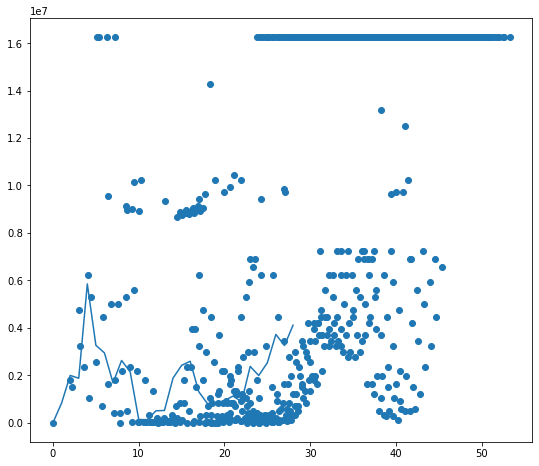

In [311]:
ix = 5
p = coords[ix]
direction = 45
atol = 20
S = W1
dx = p[0]
dy = p[1]
mask = ps.getOrientationMask(direction,atol,S,dx,dy)
sc = ps.makeSpatialScatter(p,mask,W1)

sc[:,0]
sc[:,1]

plt.scatter(sc[:,0],sc[:,1])
plt.plot(ps.variogram(sc))
plt.show()

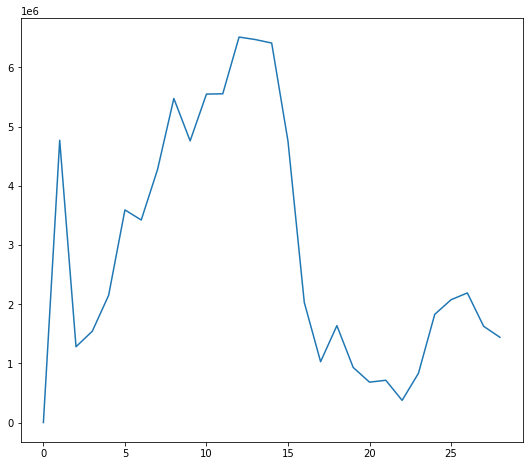

In [297]:
from skgstat import models

A = [      0.       , 4767872.         ,1280000.         ,1542826.66666667,
 2148352.         ,3591509.33333333, 3420842.66666667 ,4273664.,
 5473962.66666667, 4757504.   ,      5548032.         ,5552810.66666667,
 6511177.14285714 ,6469046.85714286 ,6410240.,         4753408.,
 2028966.4,        1027640.88888889 ,1636480.,          930171.47886107,
  681884.63674264  ,713858.67519137  ,374603.6843106   ,830699.22804625,
 1827151.92846962, 2073626.1113595,  2189344.24407719, 1625494.04624889,
 1439185.12472026]

plt.plot(A)


In [298]:
Vg = skg.Variogram(list(zip(data.x, data.y)), data.z.values,
   .....:     normalize=False, n_lags=25, maxlag=90, model='gaussian')
   .....: 

In [114]: Vg.plot();

NameError: name 'skg' is not defined

In [299]:

regions = np.zeros((len(coords),L[0].shape[0],L[0].shape[1]))

for i in range(len(coords)):
    regions[0] = regions[0] + L[i]*mask[i]+locations[i]

    
#plt.imshow(regions)

NameError: name 'L' is not defined

In [115]:
plt.imshow(regions[0]*10+labels)

NameError: name 'labels' is not defined

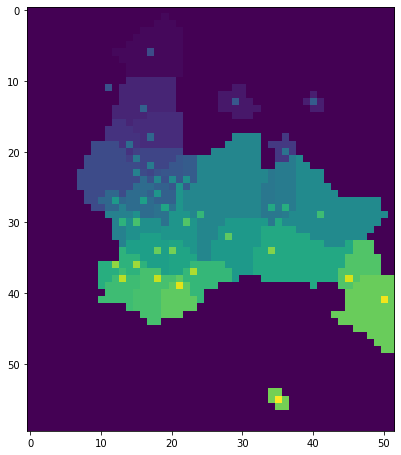

In [320]:
plt.imshow(labels+seeds*10)

In [321]:
print(np.sum(regions[0]>0))
print(np.sum(labels>0))

515
1015



| # | coords | map region with values | level |
|---|--------|------------|-------|
| 1 | [1,1]  | size(n x m)| 1     |

In [157]:
def constructRow(coord,importance,waterSheed_labels_map,variogram_Maps):
    for i,c in enumerate(coord):
        print(i,c,importance[c[0]][c[1]])
        

In [158]:
constructRow(coords,importance,wsmask,varmask)
    

0 [ 6 17] 3.0
1 [11 11] 3.0
2 [13 29] 3.0
3 [13 40] 3.0
4 [14 16] 3.0
5 [18 17] 3.0
6 [19 14] 3.0
7 [20 36] 3.0
8 [21 15] 3.0
9 [22 17] 3.0
10 [23 15] 3.0
11 [24 18] 3.0
12 [24 20] 3.0
13 [24 22] 3.0
14 [26 18] 3.0
15 [27 12] 3.0
16 [27 16] 2.0
17 [28 19] 2.0
18 [28 34] 3.0
19 [28 36] 3.0
20 [29 24] 3.0
21 [29 41] 3.0
22 [30 13] 3.0
23 [30 15] 3.0
24 [30 22] 2.0
25 [32 28] 3.0
26 [34 18] 3.0
27 [34 20] 2.0
28 [34 34] 3.0
29 [36 12] 3.0
30 [36 15] 3.0
31 [37 23] 4.0
32 [38 13] 3.0
33 [38 18] 3.0
34 [38 45] 3.0
35 [39 21] 3.0
36 [41 50] 3.0
37 [55 35] 3.0


In [204]:
# create table with pandas
import pandas as pd





In [208]:
d

{'key': 0,
 'coords': array([ 6, 17]),
 'eam': 3.0,
 'wsmask': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'varmask': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}

In [281]:
i=0
c = coords[i]
#d = {'key': i, 'coords': coords[i], 'eam': importance[c[0]][c[1]],'wsmask':wsmask[i], 'varmask':varmask[i]}
d = {'key': i, 'coordx': c[0], 'coordy':c[1] ,'eam': importance[c[0]][c[1]], 'wsmask': np.sum(wsmask[i].flatten),'varmask':np.sum(varmask[i].flatten)}
i+=1
d = {'key': i, 'coordx': c[0], 'coordy':c[1] ,'eam': importance[c[0]][c[1]], 'wsmask': np.sum(wsmask[i].flatten),'varmask':np.sum(varmask[i].flatten)}

#pd.DataFrame(d,columns=list("abcde"))
#df = pd.DataFrame(d)
#plt.imshow(d['varmask'])

d.update(d)


In [282]:
d

{'key': 1,
 'coordx': 6,
 'coordy': 17,
 'eam': 3.0,
 'wsmask': <function ndarray.flatten>,
 'varmask': <function ndarray.flatten>}

In [254]:
thisdict

thisdict.update(e)

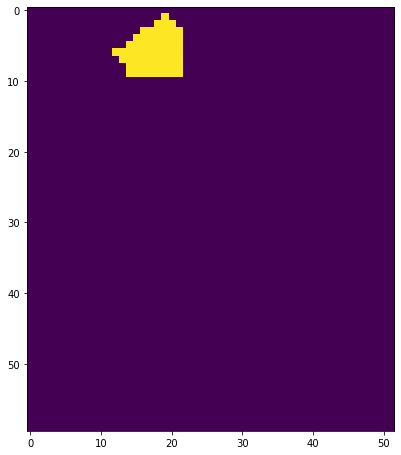

In [227]:
fimg = wsmask[i].flatten()

fimg2 = fimg.reshape(nonsat.shape[0],nonsat.shape[1])


plt.imshow(fimg2)

In [309]:
for i,c in enumerate(coords[:1]):

    d = {'key': i, 'coords': c,  'wsmask':wsmask[i],'varmask':varmask[i], 'wsxvar': wsmask[i]*varmask[i]*nonsat, "eam": int(importance[c[0]][c[1]])}
    print(d)

    

{'key': 0, 'coords': array([ 6, 17]), 'wsmask': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'varmask': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'wsxvar': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'eam': 3}


In [316]:
for i,c in enumerate(coords):
    d = {'key': i, 'coords': c, 'wsxvar': np.sum(wsmask[i]*varmask[i]*nonsat), "eam": int(importance[c[0]][c[1]])}
    print(d)

{'key': 0, 'coords': array([ 6, 17]), 'wsxvar': 768.0, 'eam': 3}
{'key': 1, 'coords': array([11, 11]), 'wsxvar': 21.0, 'eam': 3}
{'key': 2, 'coords': array([13, 29]), 'wsxvar': 485.0, 'eam': 3}
{'key': 3, 'coords': array([13, 40]), 'wsxvar': 132.0, 'eam': 3}
{'key': 4, 'coords': array([14, 16]), 'wsxvar': 998.0, 'eam': 3}
{'key': 5, 'coords': array([18, 17]), 'wsxvar': 668.4142135623731, 'eam': 3}
{'key': 6, 'coords': array([19, 14]), 'wsxvar': 480.4142135623731, 'eam': 3}
{'key': 7, 'coords': array([20, 36]), 'wsxvar': 212.0, 'eam': 3}
{'key': 8, 'coords': array([21, 15]), 'wsxvar': 191.0, 'eam': 3}
{'key': 9, 'coords': array([22, 17]), 'wsxvar': 787.7147766421189, 'eam': 3}
{'key': 10, 'coords': array([23, 15]), 'wsxvar': 1286.2912678646603, 'eam': 3}
{'key': 11, 'coords': array([24, 18]), 'wsxvar': 259.89292222699214, 'eam': 3}
{'key': 12, 'coords': array([24, 20]), 'wsxvar': 482.0, 'eam': 3}
{'key': 13, 'coords': array([24, 22]), 'wsxvar': 340.0, 'eam': 3}
{'key': 14, 'coords': arr

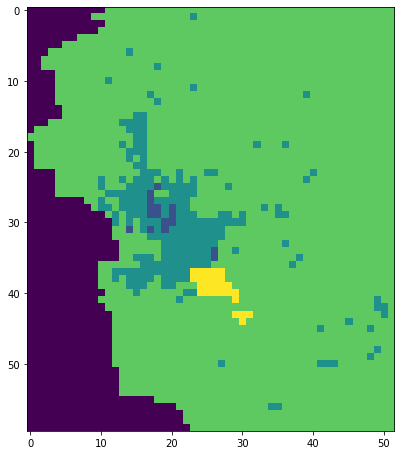

In [320]:
plt.imshow(importance)

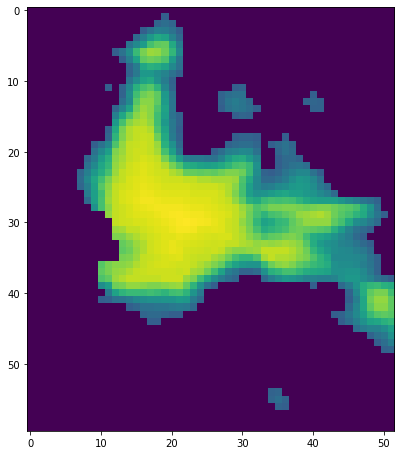

In [327]:
plt.imshow(nonsat)

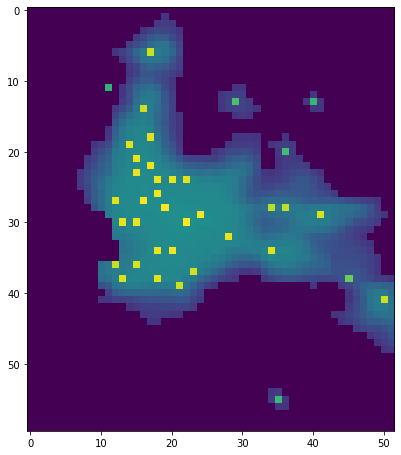

In [332]:
plt.imshow(seeds*np.max(nonsat)+nonsat)

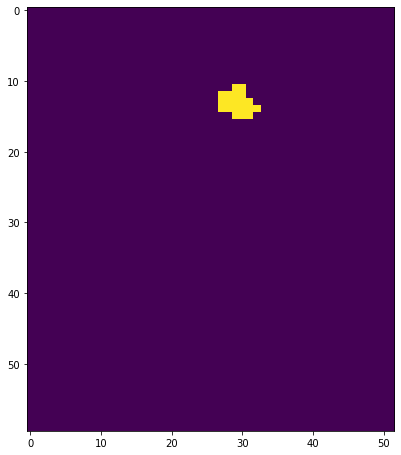

In [157]:


plt.imshow(L[2])

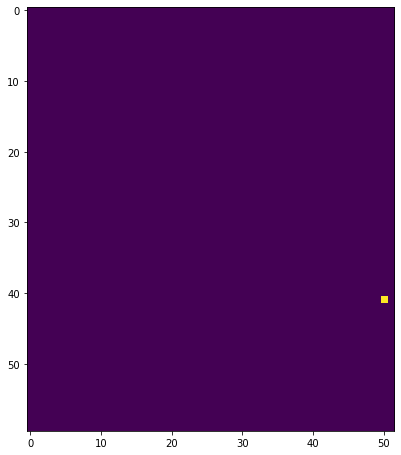

In [11]:
plt.imshow(W2)


zeros = np.zeros(W2.shape)


zeros[41,50]=1

plt.imshow(zeros)

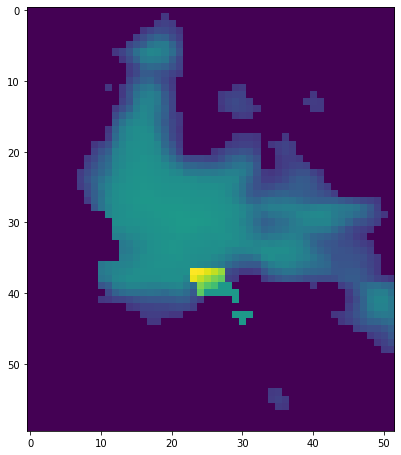

In [12]:
plt.imshow((np.max(nonsat)-1)*(importance==4)+nonsat)

In [17]:
variogram, mask ,locations = computeRegions(nonsat,coords_nonsat[:],th = 0.25 ,atol=10,direction_delta = 2)

Coords  [ 6 17]
0.0 %


/Users/rodrigo/opt/anaconda3/envs/machineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/rodrigo/opt/anaconda3/envs/machineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

--
Coords  [11 11]
2.1739130434782608 %
--
Coords  [13 29]
4.3478260869565215 %
--
Coords  [13 40]
6.521739130434782 %
--
Coords  [14 16]
8.695652173913043 %
--
Coords  [18 17]
10.869565217391305 %
--
Coords  [19 14]
13.043478260869565 %
--
Coords  [19 17]
15.217391304347828 %
--
Coords  [20 36]
17.391304347826086 %
--
Coords  [21 15]
19.565217391304348 %
--
Coords  [22 17]
21.73913043478261 %
--
Coords  [23 15]
23.91304347826087 %
--
Coords  [24 18]
26.08695652173913 %
--
Coords  [24 20]
28.26086956521739 %
--
Coords  [24 22]
30.434782608695656 %
--
Coords  [26 18]
32.608695652173914 %
--
Coords  [27 12]
34.78260869565217 %
--
Coords  [27 16]
36.95652173913043 %
--
Coords  [28 19]
39.130434782608695 %
--
Coords  [28 34]
41.30434782608695 %
--
Coords  [28 36]
43.47826086956522 %
--
Coords  [29 13]
45.65217391304348 %
--
Coords  [29 24]
47.82608695652174 %
--
Coords  [29 41]
50.0 %
--
Coords  [30 13]
52.17391304347826 %
--
Coords  [30 15]
54.347826086956516 %
--
Coords  [30 22]
56.52173

In [18]:
len(variogram)

46

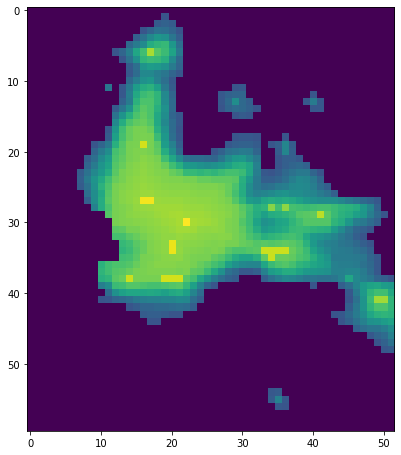

In [19]:
plt.imshow(seeds_nonsat*10+nonsat)

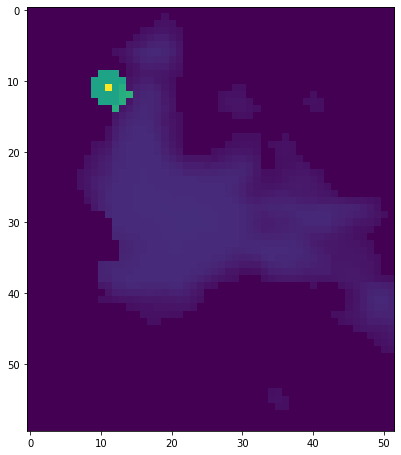

In [20]:
 plt.imshow(nonsat*50+mask[1]*np.max(W1)+locations[1]*10000)
    

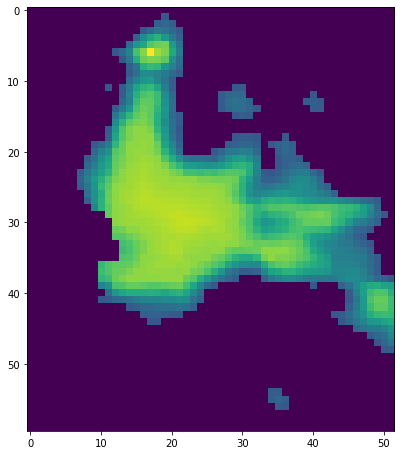

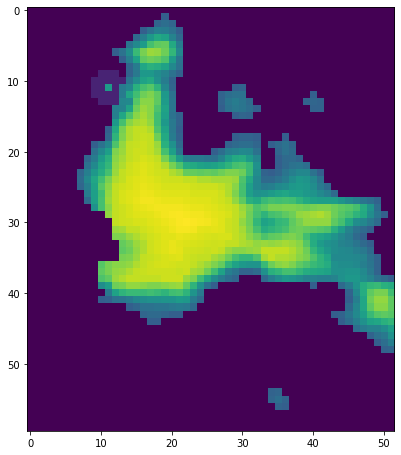

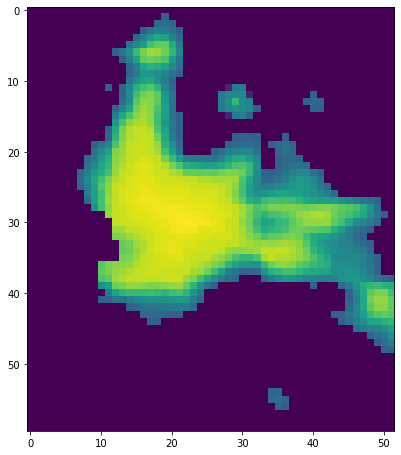

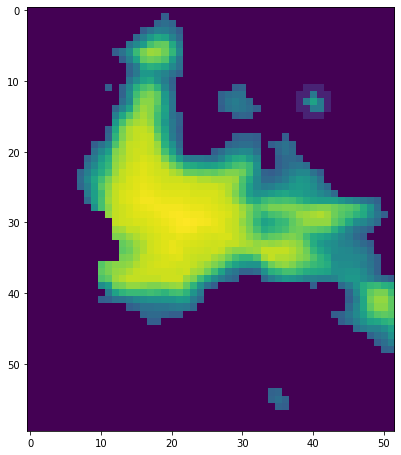

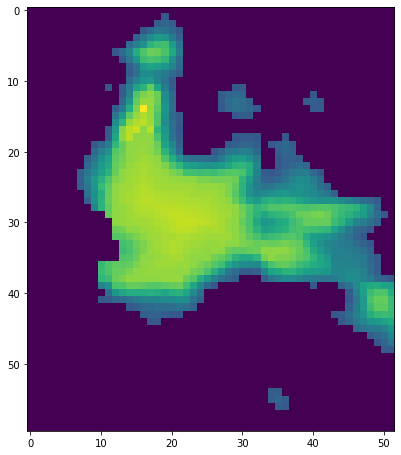

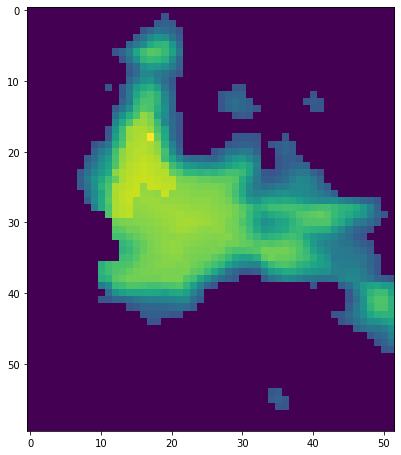

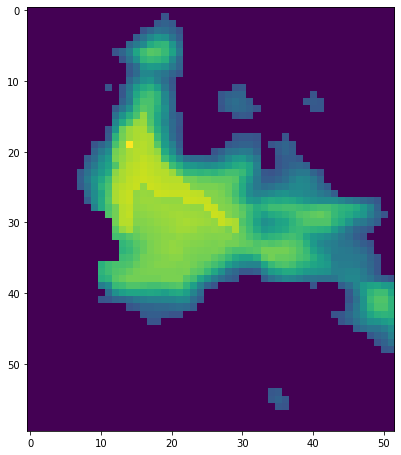

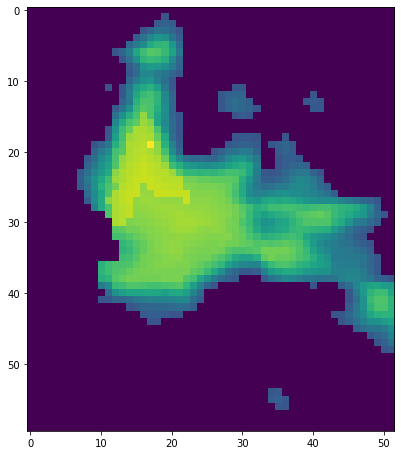

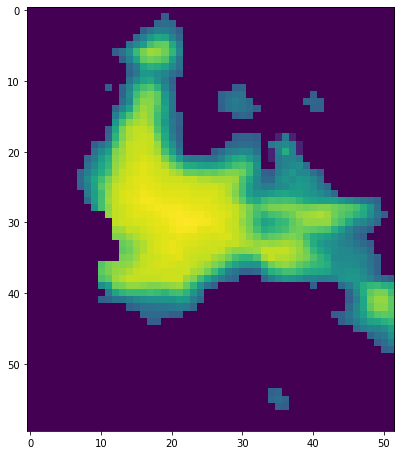

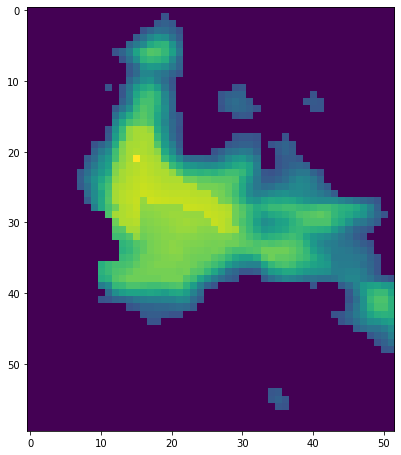

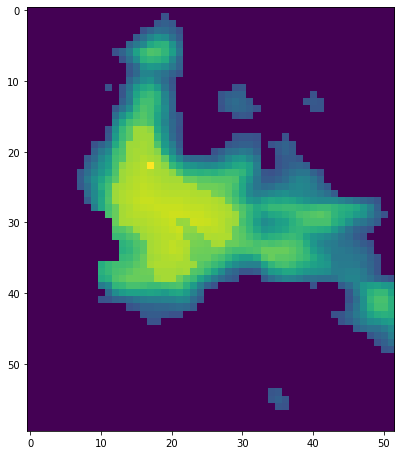

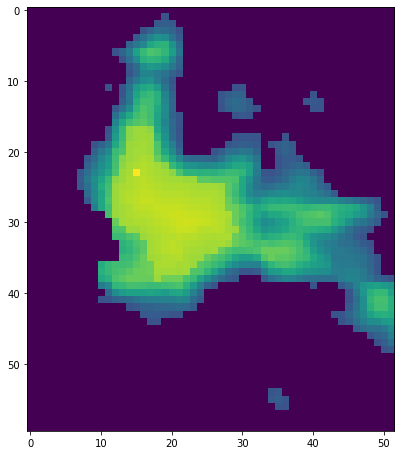

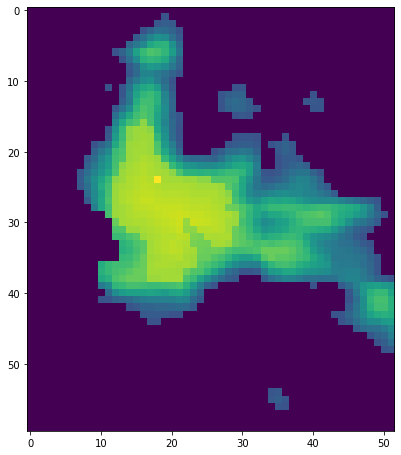

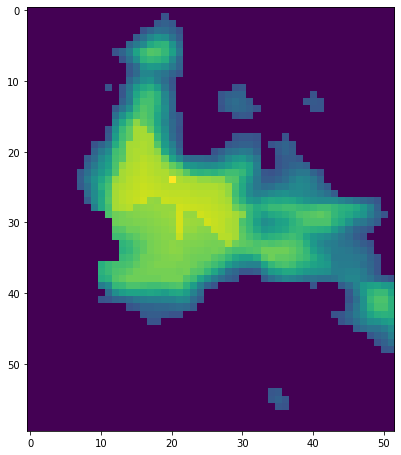

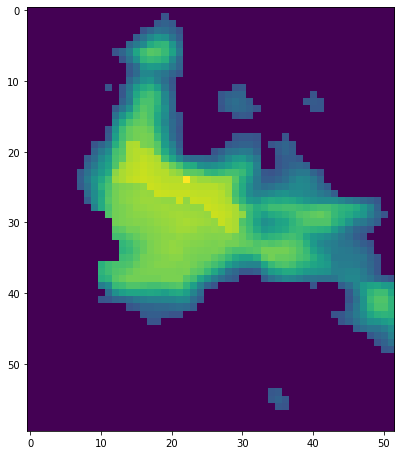

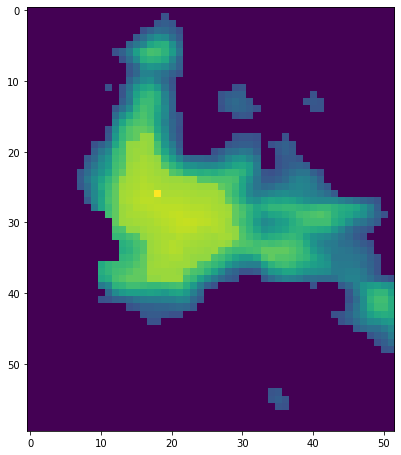

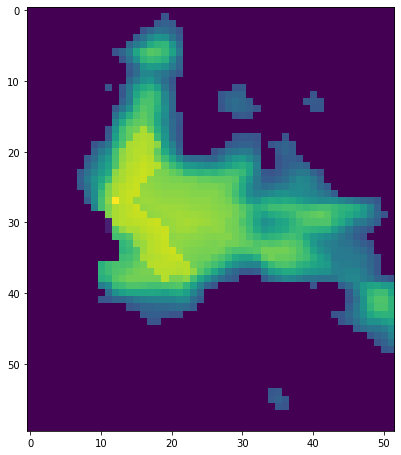

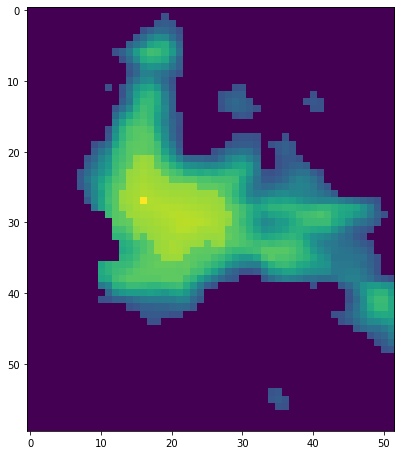

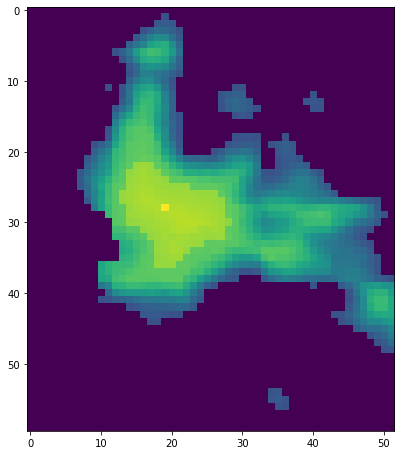

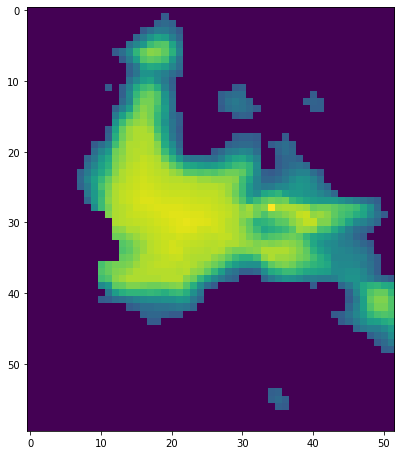

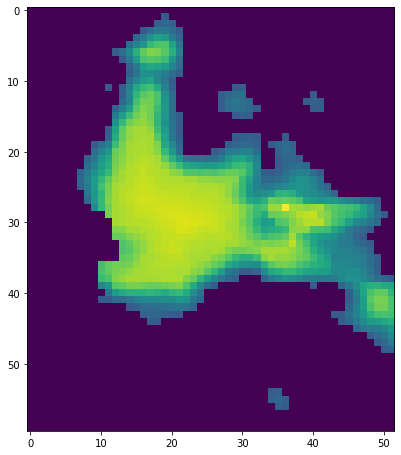

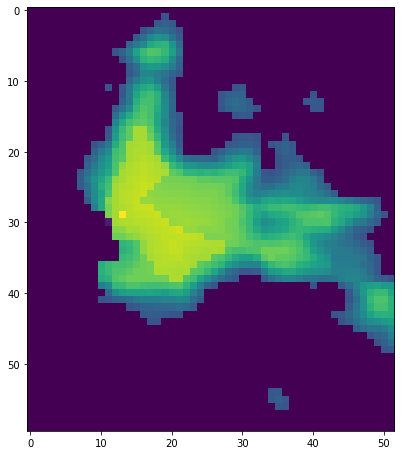

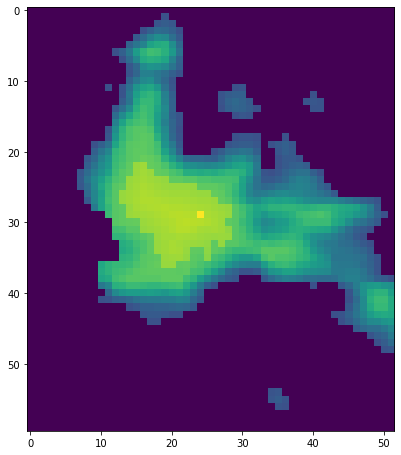

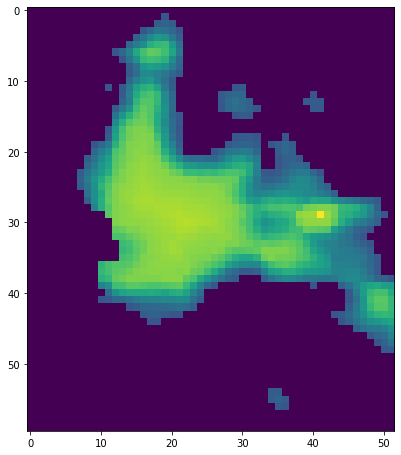

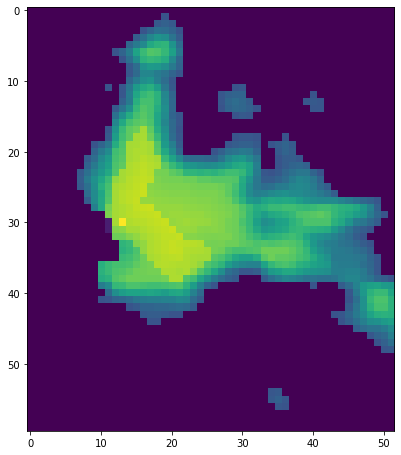

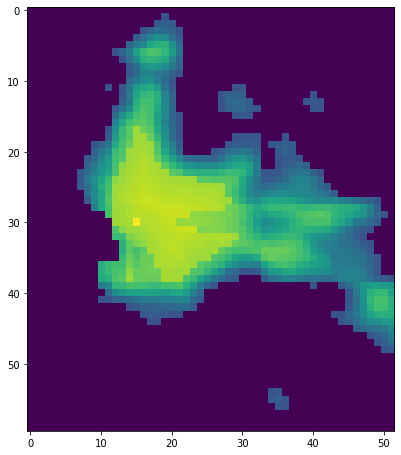

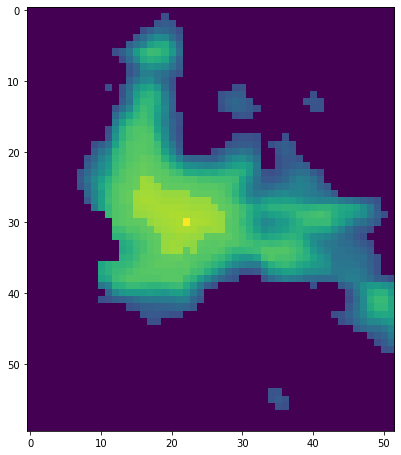

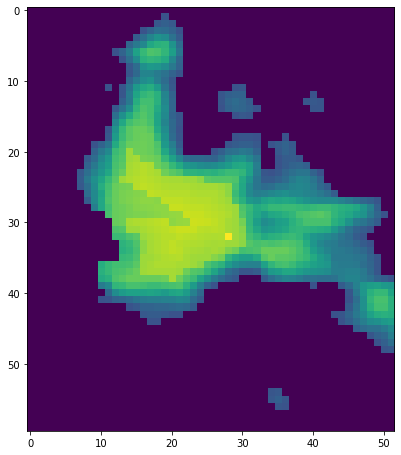

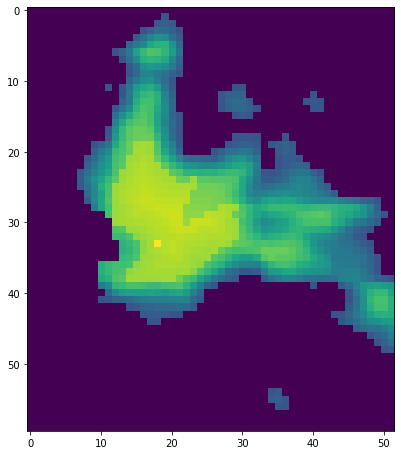

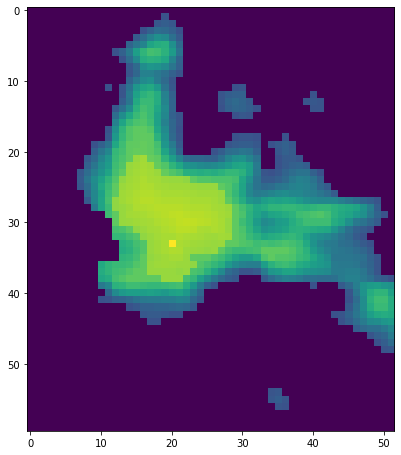

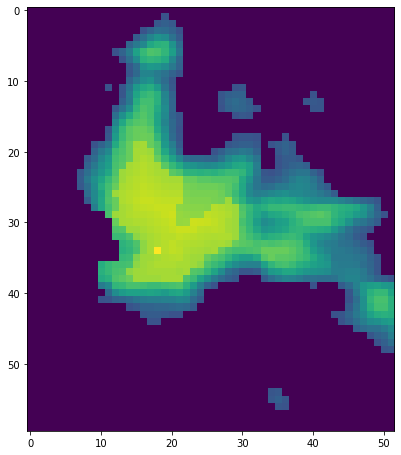

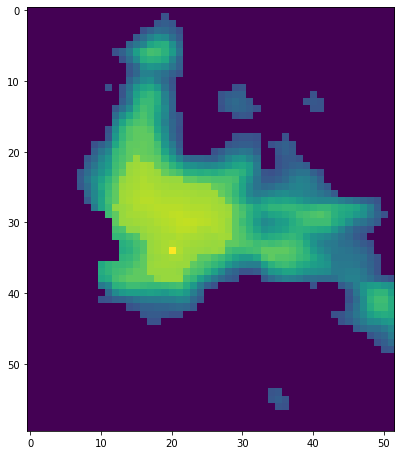

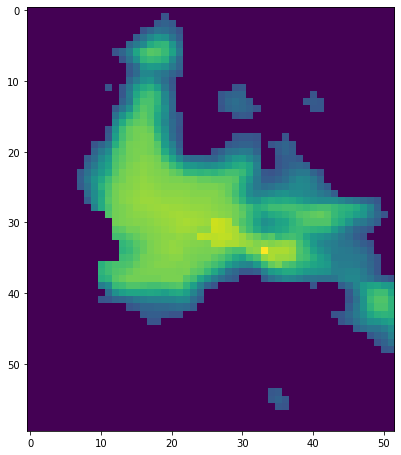

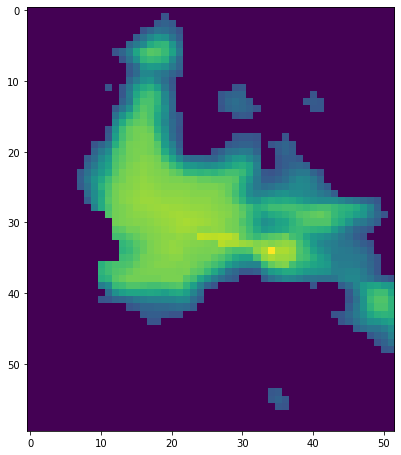

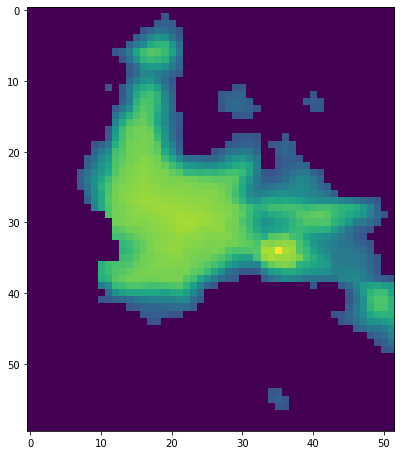

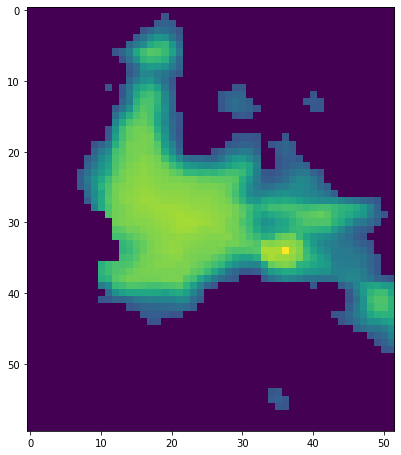

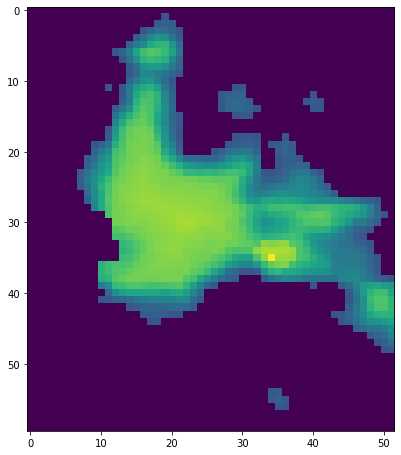

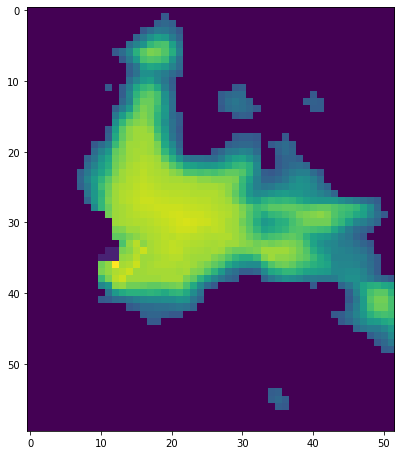

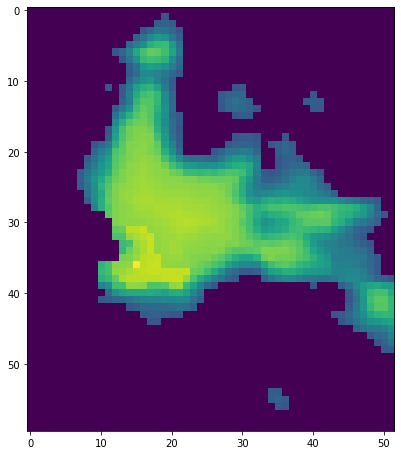

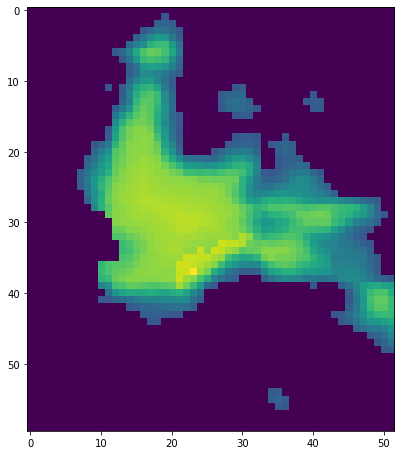

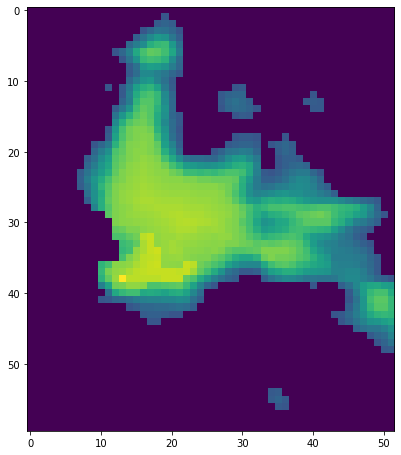

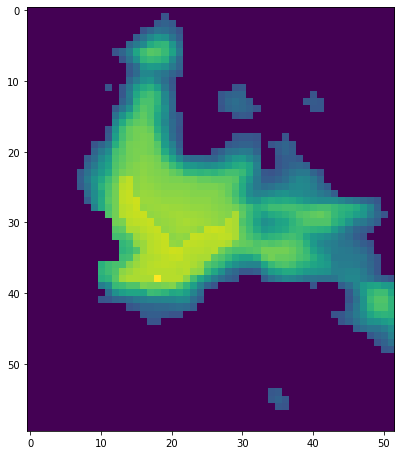

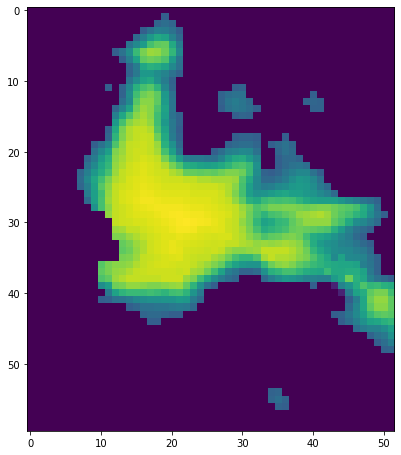

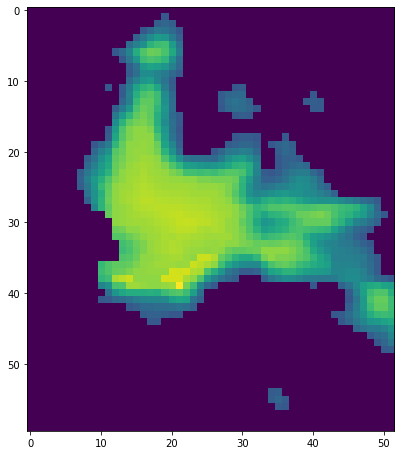

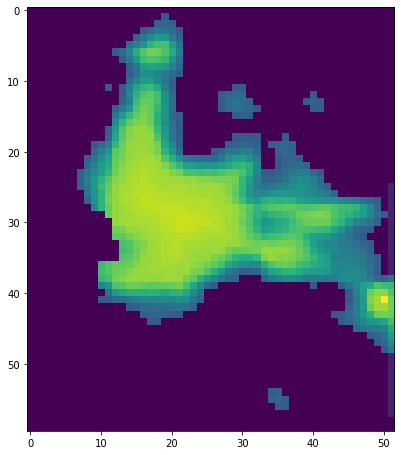

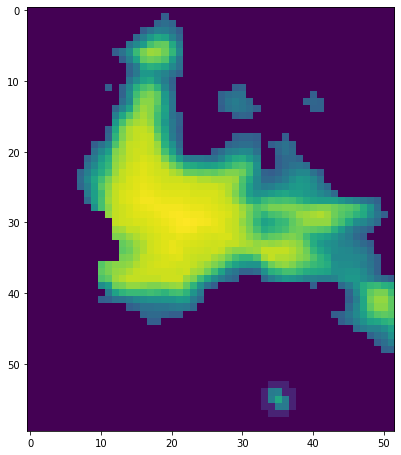

In [21]:
for i in range(len(variogram)):
#    plt.imshow(mask[i]+locations[i])
    plt.imshow(nonsat*10+mask[i]*np.max(nonsat)+locations[i]*100)
    plt.show()

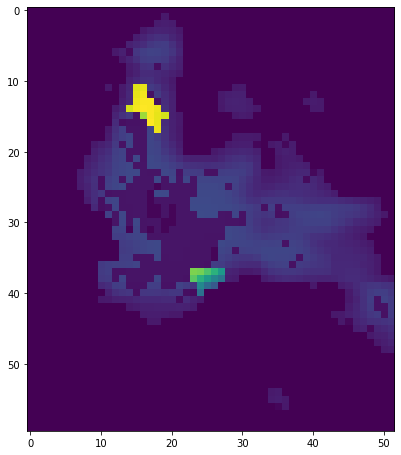

In [1389]:
plt.imshow(W1+mask[4]*np.max(W1))

Carga de Imágenes

In [785]:
#Region priorities of Jorge and Lamphar
#P = np.array(Image.open('example/inputs/prioridades'))

#calcular este valor automaticamente
nc = 5

# 0 máxima prioridad
# 4 mínima prioridad (antes espacio nan)
P = np.where(np.isnan(P),nc, P)-1 
P = P.max()-P


im1_gr = ps.filtro_fuerza_puntual(im1,h=3,e=4)

W1 = ps.f5(im1,P)
W2 = ps.f5(im1_gr,P)

In [1408]:



#plt.imshow(P)

P[0][0]


4.0

In [1410]:
th = 62
image = im1>=th
distance = ndi.distance_transform_edt(image)


nons = (im1>=th)*im1

nonsat = im1+(distance)


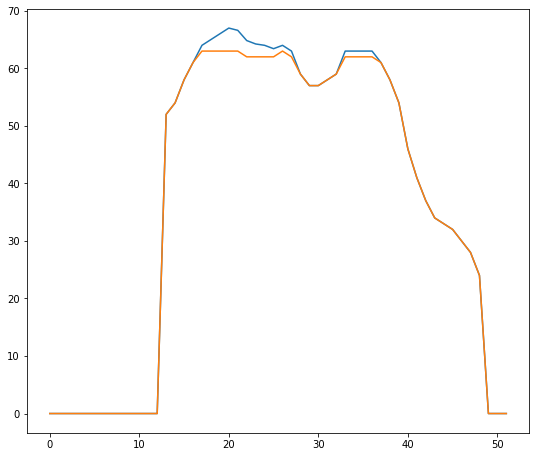

In [1411]:
plt.plot(nonsat[34][:])
plt.plot(im1[34][:])

Transformada de la distancia en la región saturada. Usamos esta en vez de la transformación que nos inventamos

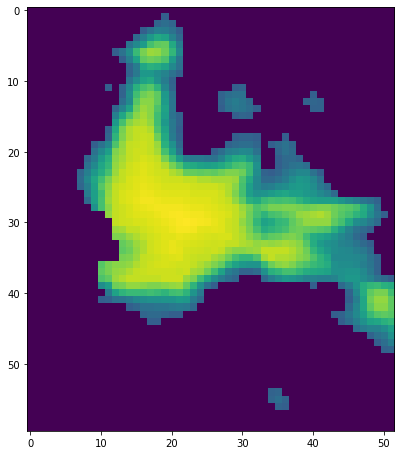

In [719]:
plt.imshow(nonsat)
plt.show()

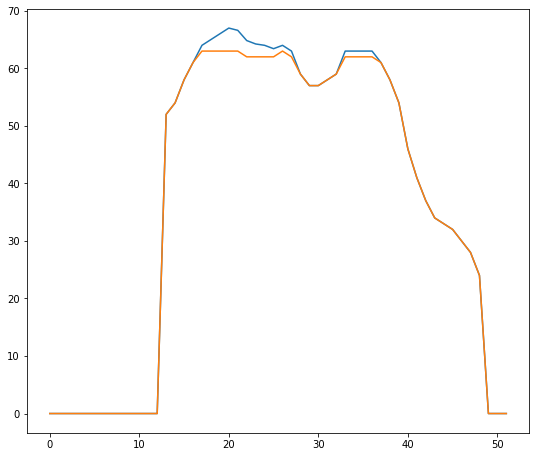

In [437]:
# Ejemplo Sección desaturada vs original saturada fila 34

plt.plot(nonsat[34,:])
plt.plot(im1[34,:])

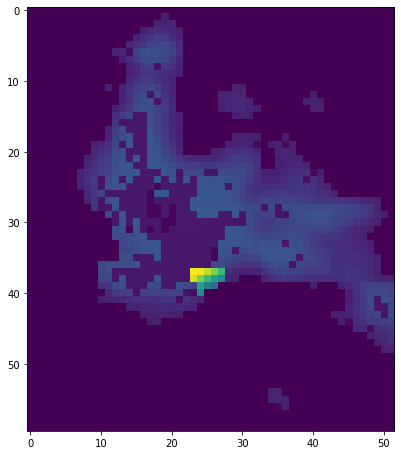

In [754]:




W1_nonsat = ps.f5(nonsat,P)

plt.imshow(W1_nonsat)

In [10]:
atol = 30
rs=30
th = 0.0025
setC = np.zeros(W1_nonsat.shape)
f = 1

NameError: name 'W1_nonsat' is not defined

In [440]:
#seeds = ps.getMax(nonsat,P)
seeds = ps.getMax(W1_nonsat)
coords = ps.get_coords(seeds)

In [9]:
plt.imshow(seeds*np.max(W1_nonsat)/5+W1_nonsat)

NameError: name 'W1_nonsat' is not defined

[ 6 17]


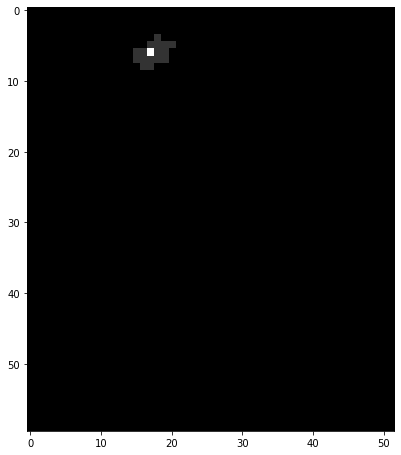

[11 11]


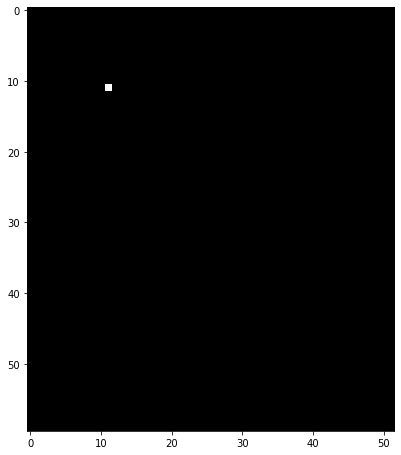

[13 29]


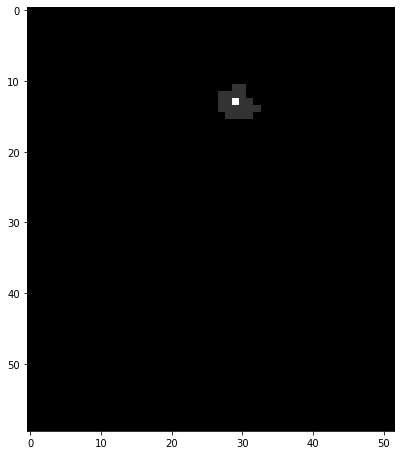

[13 40]


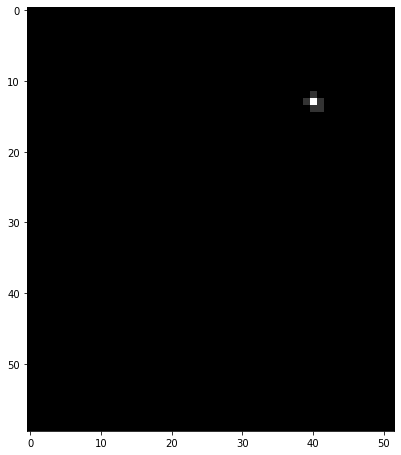

[14 16]


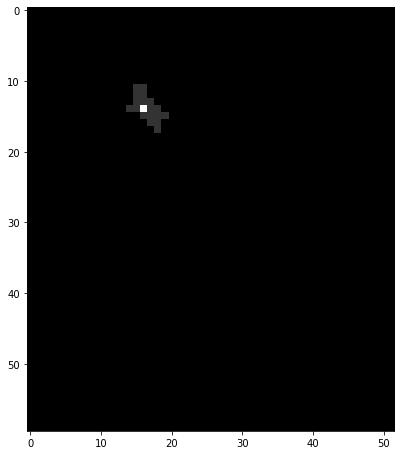

[18 17]


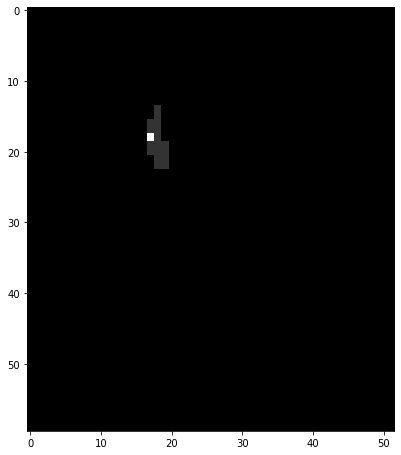

[19 14]


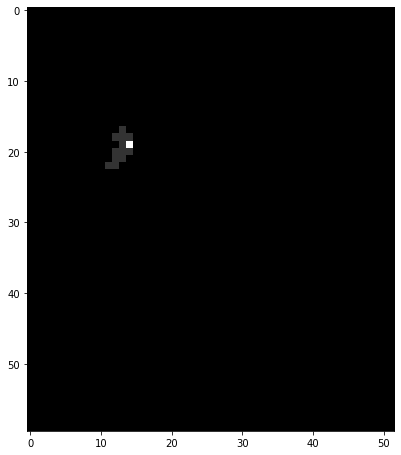

[19 17]


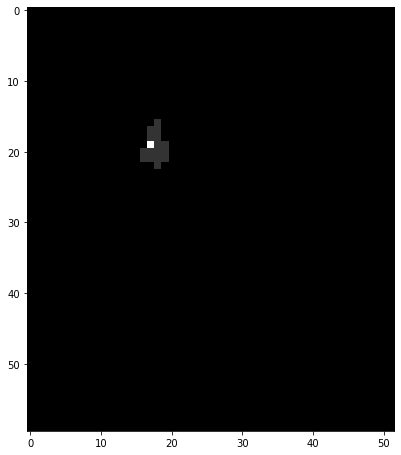

[20 36]


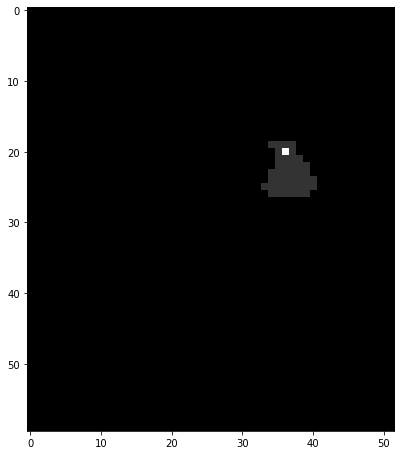

[21 15]


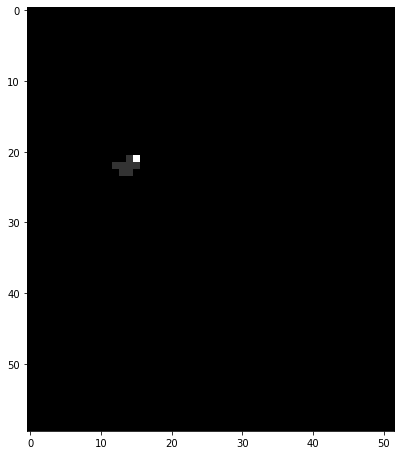

[22 17]


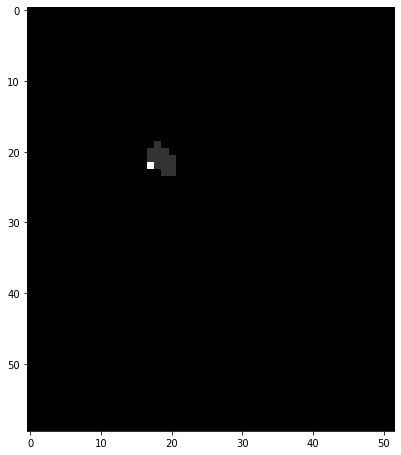

[23 15]


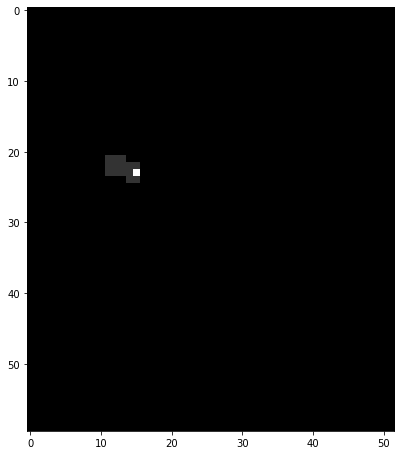

[24 18]


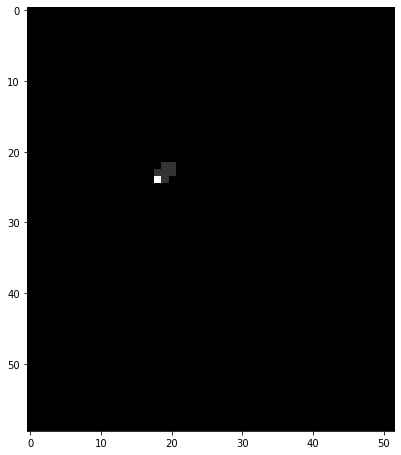

[24 20]


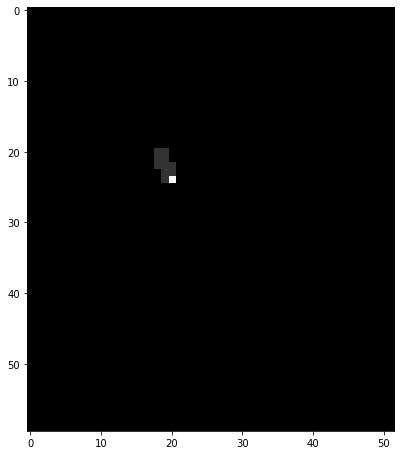

[24 22]


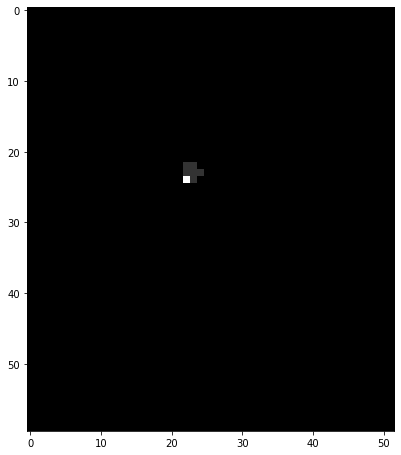

[26 18]


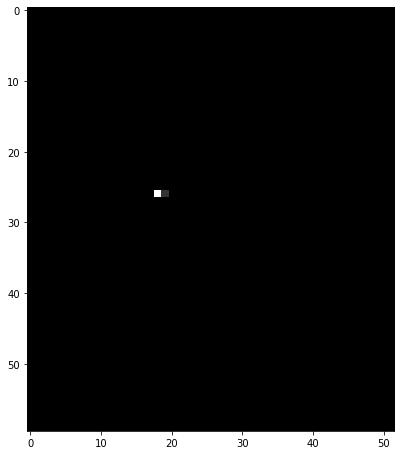

[27 12]


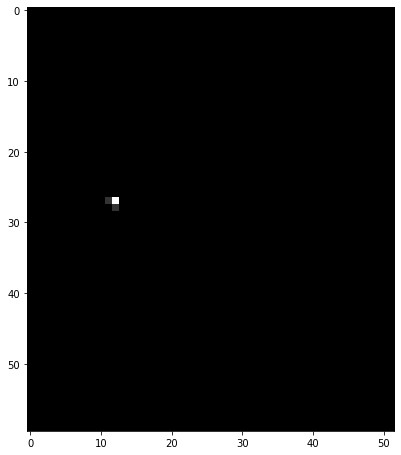

[27 16]


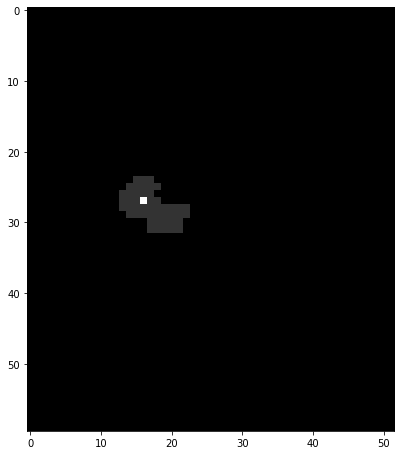

[28 19]


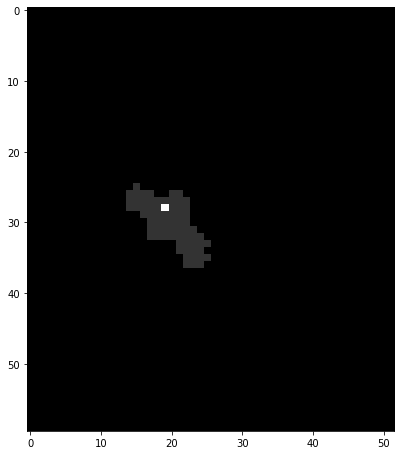

[28 34]


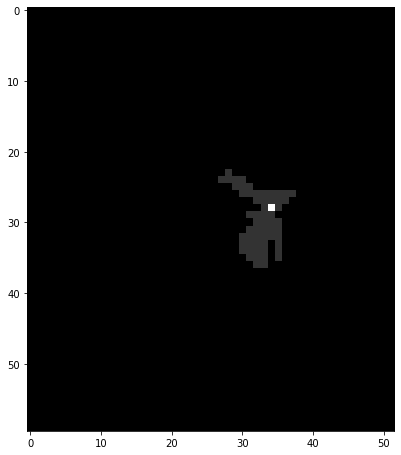

[28 36]


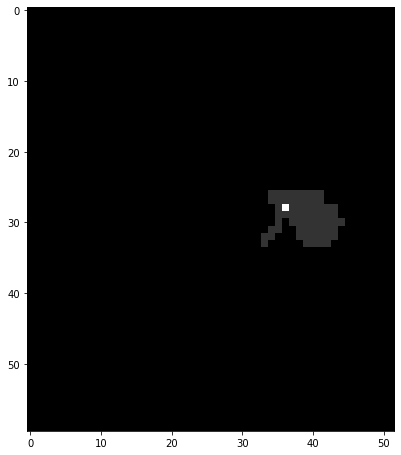

[29 13]


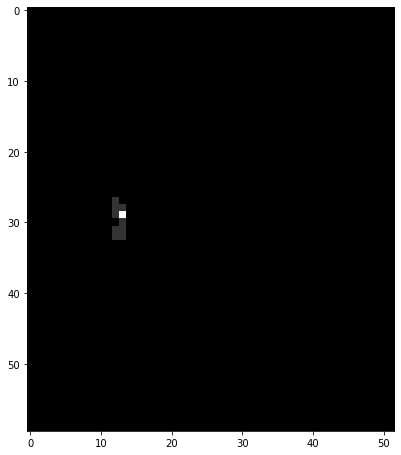

[29 24]


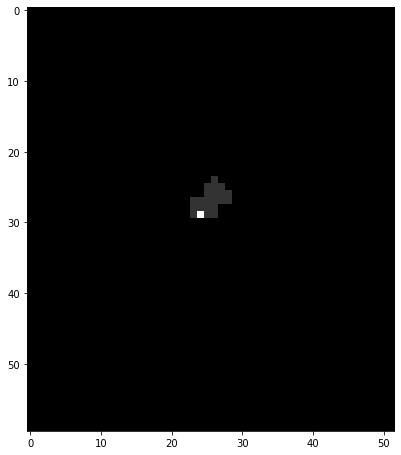

[29 41]


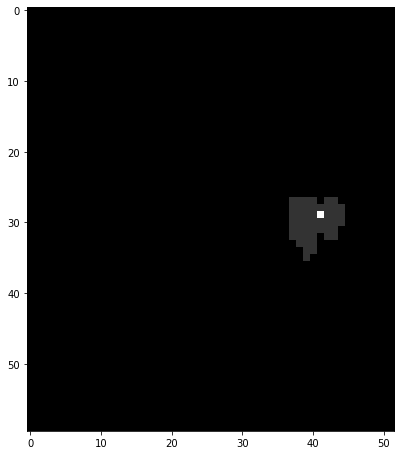

[30 13]


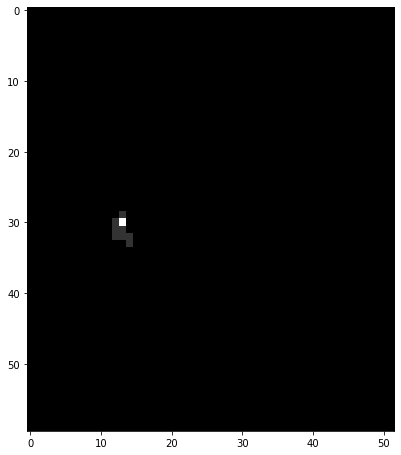

[30 15]


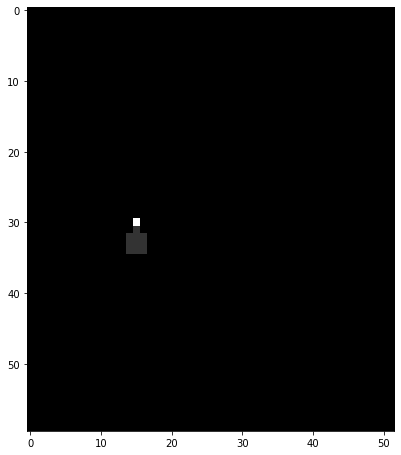

[30 22]


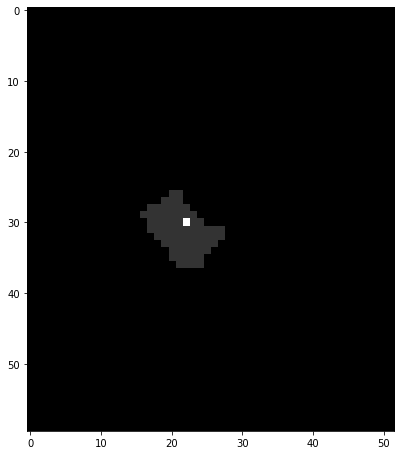

[32 28]


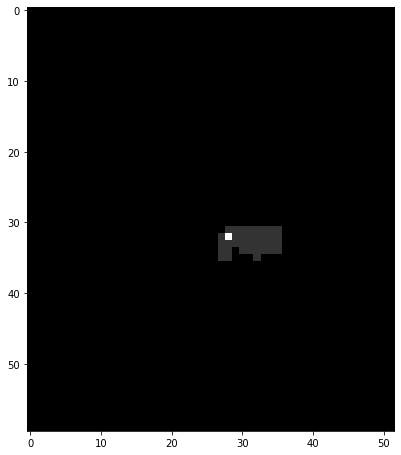

[33 18]


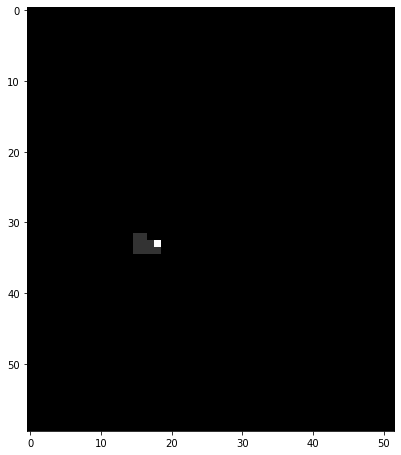

[33 20]


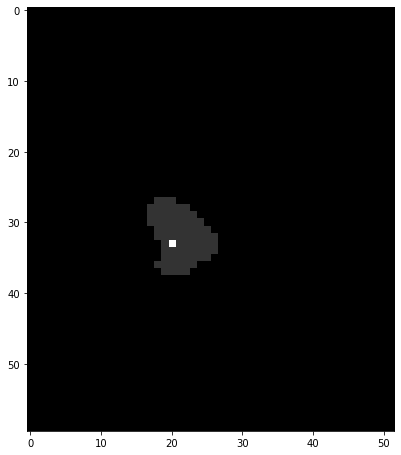

[34 18]


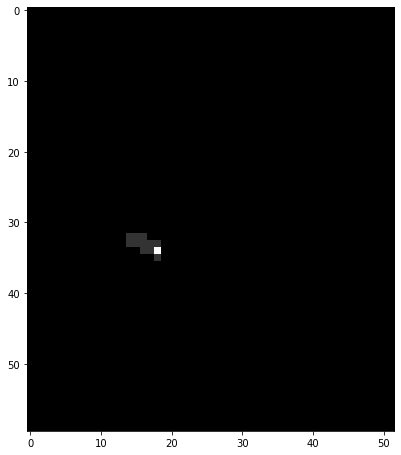

[34 20]


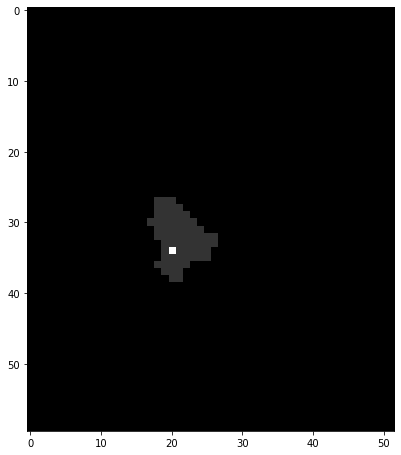

[34 33]


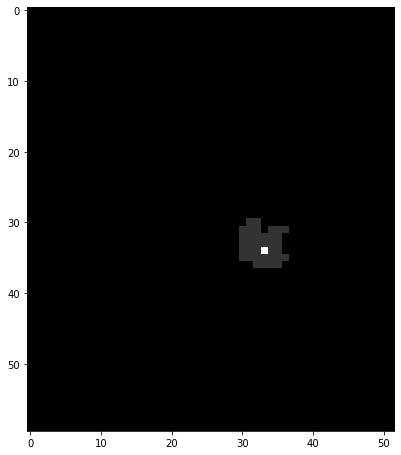

[34 34]


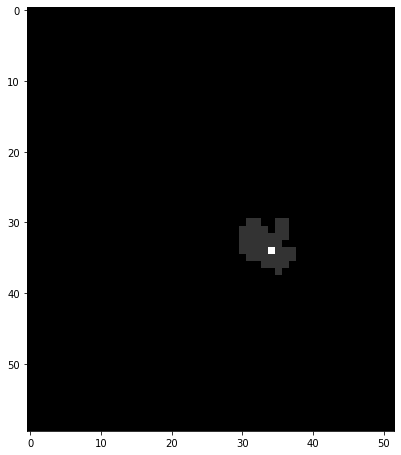

[34 35]


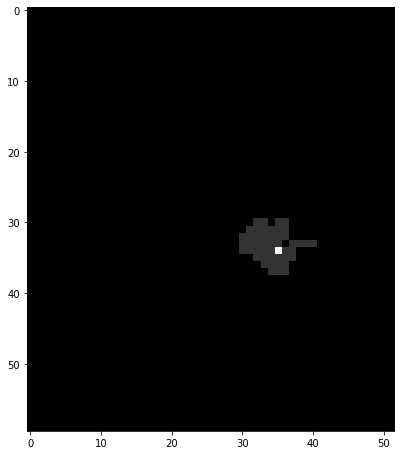

[34 36]


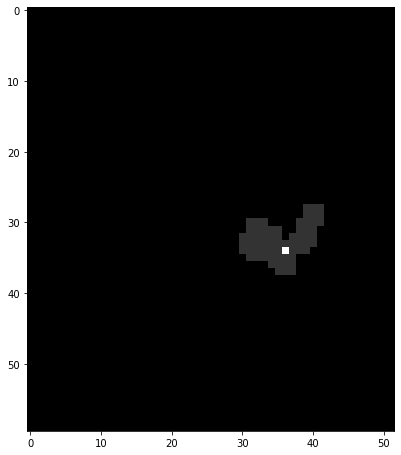

[35 34]


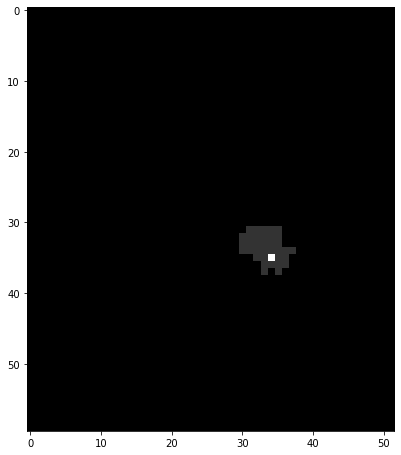

[36 12]


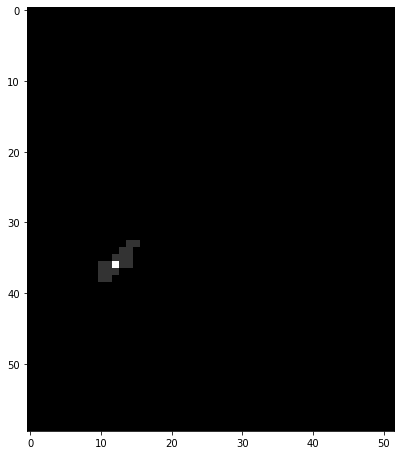

[36 15]


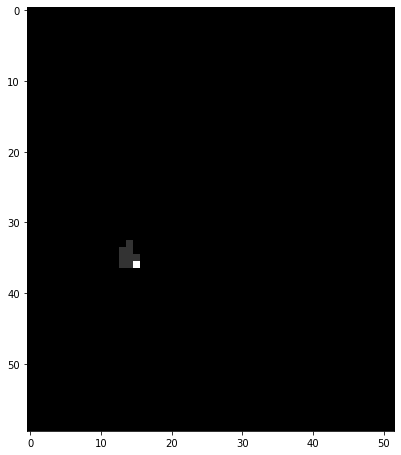

[37 23]


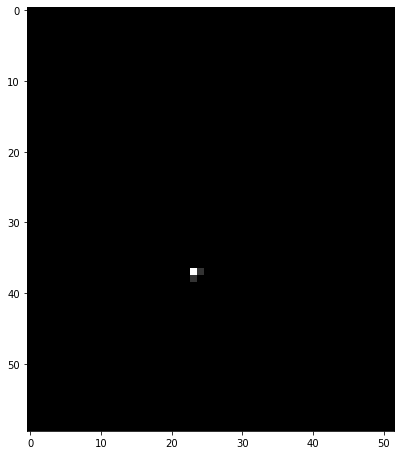

[38 13]


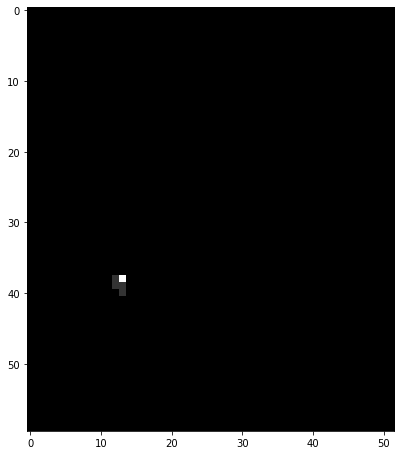

[38 18]


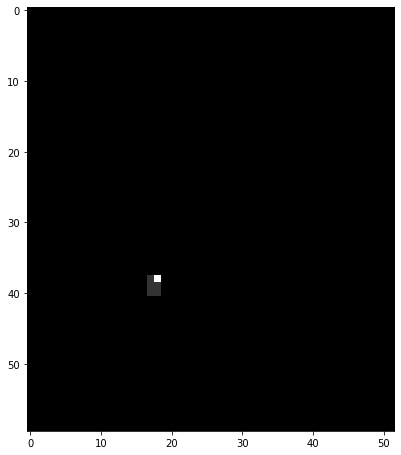

[38 45]


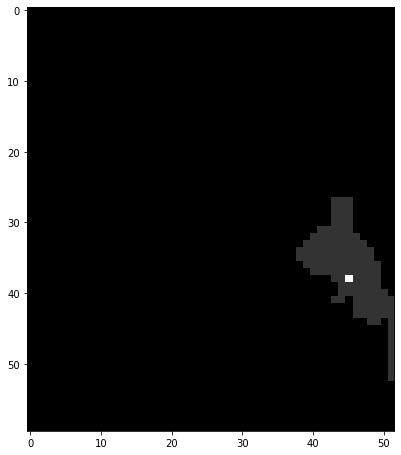

[39 21]


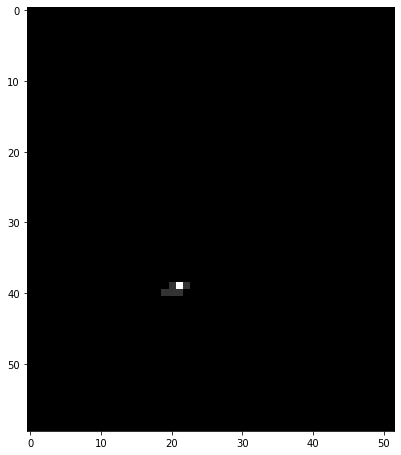

[41 50]


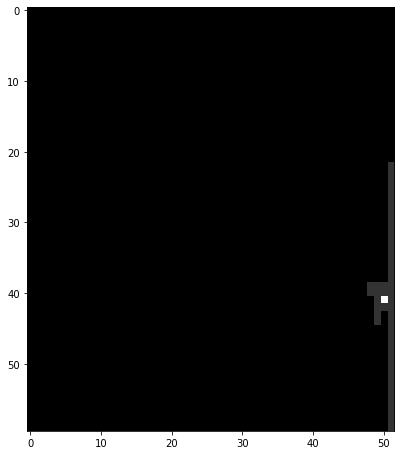

[55 35]


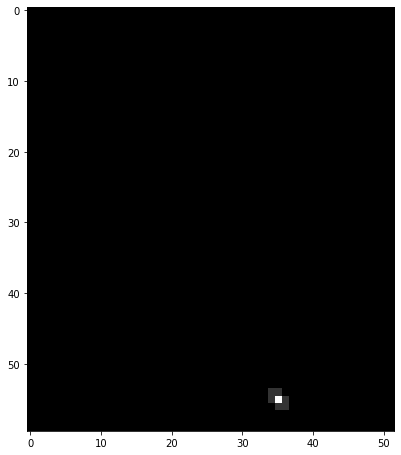

In [630]:
nonsat = W1_nonsat

footprint = disk(2)
atol = 30
rs=30
th = 0.003
setC = np.zeros(nonsat.shape)
f = 1
th = 100000
th = 589824

z = np.zeros((len(coords[1:]),nonsat.shape[0],nonsat.shape[1]))
mz = np.zeros((len(coords[1:]),nonsat.shape[0],nonsat.shape[1]))



for i,c in enumerate(coords[1:]):
    
    print(c)
    setC = np.zeros(nonsat.shape)
    dy = c[0]
    dx = c[1]

    for direction in range(0,359,2):
        
        setA = np.zeros(nonsat.shape)
        setB = np.zeros(nonsat.shape)

        gm1 = direction-atol
        gm2 = direction+atol
    
        m1 = np.tan(np.radians(gm1))
        m2 = np.tan(np.radians(gm2))

        for y in range(nonsat.shape[0]):
            for x in range(nonsat.shape[1]):
                
                #if angle is in right or left side
                if gm1<90 or gm1>90*3:
                    setA[y][x] = 1 if m1*(x-dx)+dy-y <0 else 0
                else:
                    setA[y][x] = 0 if m1*(x-dx)+dy-y <0 else 1

                if gm2<90 or gm2>90*3:
                    setB[y][x] = 0 if m2*(x-dx)+dy-y <0 else 1
                else:
                    setB[y][x] = 1 if m2*(x-dx)+dy-y < 0 else 0
                    

        mask = setA*setB
        p = np.array([dy,dx])
        sc = ps.makeSpatialScatter(p,mask,nonsat)
        accum = ps.variogram(sc)
        
 #       if not(direction<90 or direction>90*3):
            
        # detectamos hasta que indice se cumple el requerimiento de la varianza
        
        ##
        bs = accum <= th
        nf = np.where(bs==False)

        if len(nf[0])>0:

            bs[nf[0][0]:] = False
            radio = np.sum(bs)

        else:
    
            radio = len(bs)

        if direction==358:
         #   print("accum ",accum)
            inspect_p = p
            inspect_accum = accum
            inspect_mask = mask
            inspect_radio = radio
        
        for r in np.arange(0,radio,0.1):
 
            y = np.int(np.round(r*np.sin(np.radians(direction))))
            x = np.int(np.round(r*np.cos(np.radians(direction))))
            
            #we take care of the squared boundaries
            py = nonsat.shape[0]-1 if dy+y>=nonsat.shape[0] else dy+y
            px = nonsat.shape[1]-1 if dx+x>=nonsat.shape[1] else dx+x

            
     #       setC[py,px]=accum[int(r)]
            z[i][py,px] = accum[int(r)]
            mz[i][py,px]=1
 
#    z[i]=setC
    loc = np.zeros(nonsat.shape)
    loc[c[0]][c[1]]=1
    plt.imshow((mz[i]>0)+loc*4, cmap=plt.get_cmap("gray"))
    
    plt.show()
    
    


nonsat


In [629]:
(np.max(nonsat.flatten())/100*5)**2

589824.0

In [612]:
bs = inspect_accum <= th
nf = np.where(bs==False)

if len(nf[0])>0:
    
    bs[nf[0][0]:] = False
    r = np.sum(bs)

else:
    
    r = len(bs)
    
    
inspect_radio

1

In [597]:
for i,c in enumerate(coords):
    print(i,c)
    

0 [0 0]
1 [ 6 17]
2 [11 11]
3 [13 29]
4 [13 40]
5 [14 16]
6 [18 17]
7 [19 14]
8 [19 17]
9 [20 36]
10 [21 15]
11 [22 17]
12 [23 15]
13 [24 18]
14 [24 20]
15 [24 22]
16 [26 18]
17 [27 12]
18 [27 16]
19 [28 19]
20 [28 34]
21 [28 36]
22 [29 13]
23 [29 24]
24 [29 41]
25 [30 13]
26 [30 15]
27 [30 22]
28 [32 28]
29 [33 18]
30 [33 20]
31 [34 18]
32 [34 20]
33 [34 33]
34 [34 34]
35 [34 35]
36 [34 36]
37 [35 34]
38 [36 12]
39 [36 15]
40 [37 23]
41 [38 13]
42 [38 18]
43 [38 45]
44 [39 21]
45 [41 50]
46 [55 35]


In [334]:
sc = ps.makeSpatialScatter((5,15),inspect_mask,nonsat)

sc = np.sort(sc,axis=0)

vg=ps.variogram(sc)


vg



NameError: name 'inspect_mask' is not defined

In [430]:
h=3
ix = (sc[:,0]>(h-1))*(sc[:,0]<=h)

sc[ix]


array([[2.23606798e+00, 1.47865600e+06],
       [2.23606798e+00, 2.76889600e+06],
       [3.00000000e+00, 3.44473600e+06]])

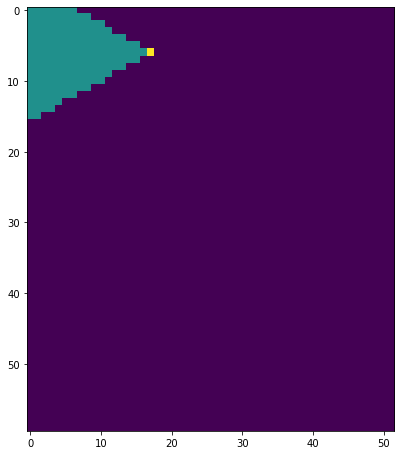

In [401]:
inspect_mask[c[0]][c[1]]=2
plt.imshow(inspect_mask)

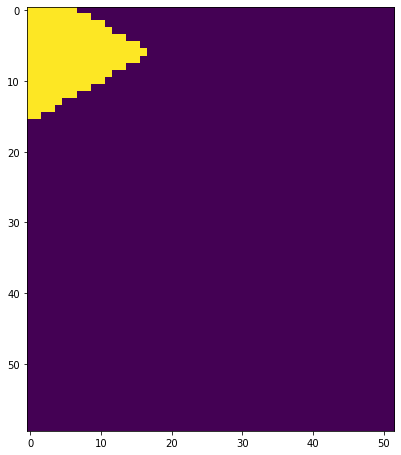

In [351]:
accum<th

plt.imshow(inspect_mask)



array([2.04800000e+03, 5.12000000e+04, 1.95242667e+05, 9.96010667e+05,
       3.16170240e+06, 7.12908800e+06, 7.12908800e+06, 7.12908800e+06,
       7.12908800e+06, 7.12908800e+06, 7.12908800e+06, 7.12908800e+06,
       6.80818215e+06, 6.36040533e+06, 6.72085333e+06, 6.77368123e+06,
       7.12908800e+06, 7.12908800e+06, 7.12908800e+06, 7.12908800e+06,
       7.12908800e+06, 7.12908800e+06, 7.12908800e+06, 6.62925553e+06,
       6.39988622e+06, 6.90143663e+06, 7.12908800e+06, 7.12908800e+06,
       7.12908800e+06])

In [411]:
(nonsat[c[0]][c[1]-1]-nonsat[c[0]][c[1]])**2


65536.0

In [152]:
from numpy import asarray
from numpy import savetxt


for i in range(0,len(z)):
    savetxt("variograms/data_variogram_{n}.csv".format(n=str(i)),z[i],delimiter=",")

savetxt("variograms/positions.csv".format(n=str(i)),coords[1:],delimiter=",")



In [154]:
from numpy import loadtxt

dict_data = loadtxt('variograms/'+'positions.csv',delimiter=",")


# extract the first array
#dict_data
# print the array
#print(data)


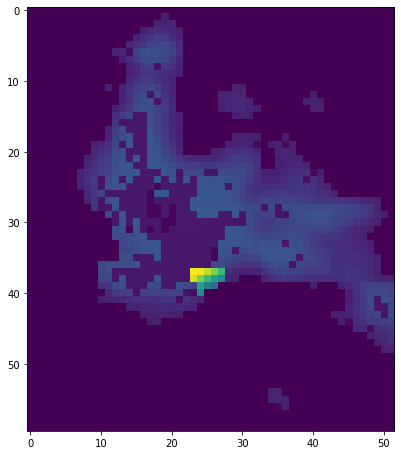

In [156]:
A = [nonsat,nonsat]
plt.imshow(A[1])


NameError: name 'im1' is not defined

In [132]:
labels = waterShedRegions(W1,coords) 

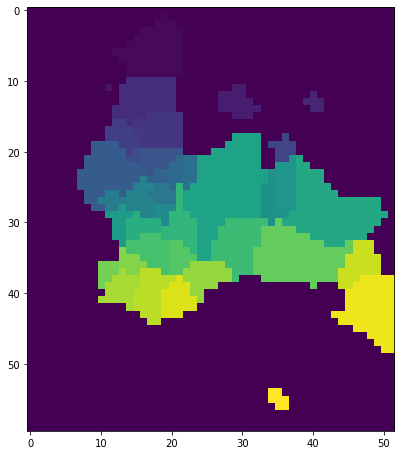

In [133]:
plt.imshow(labels)

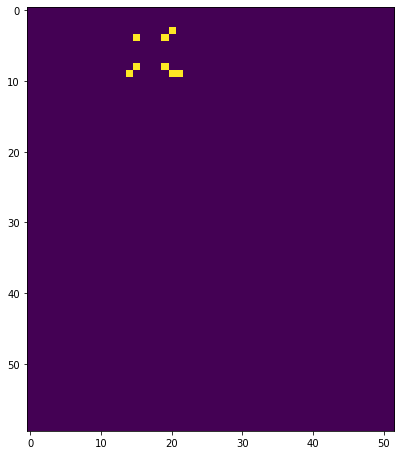

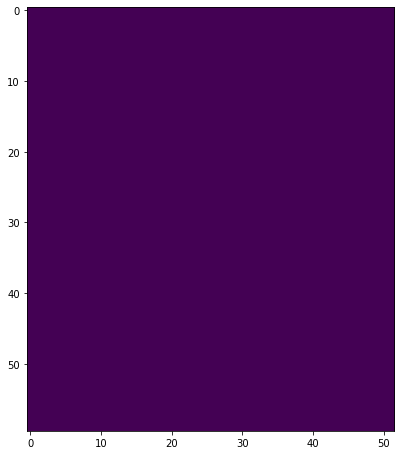

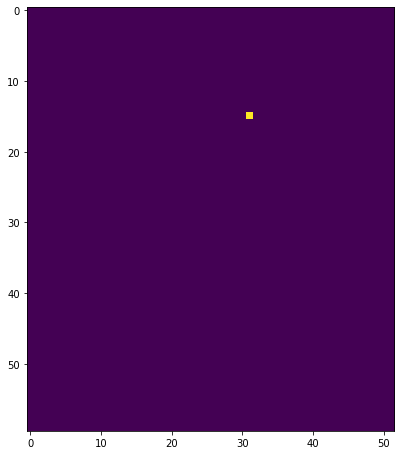

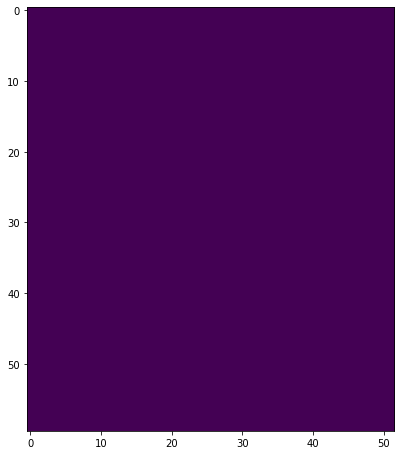

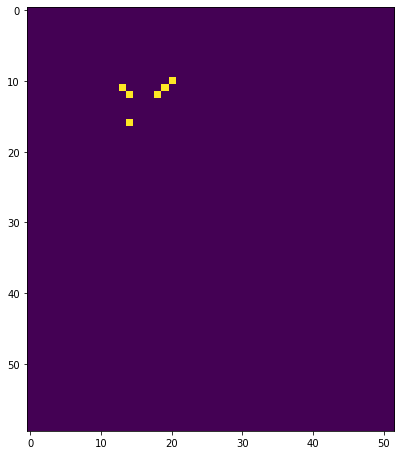

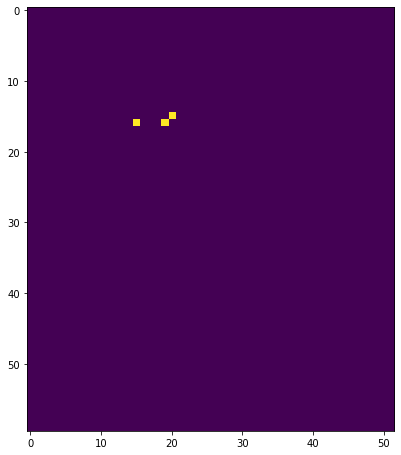

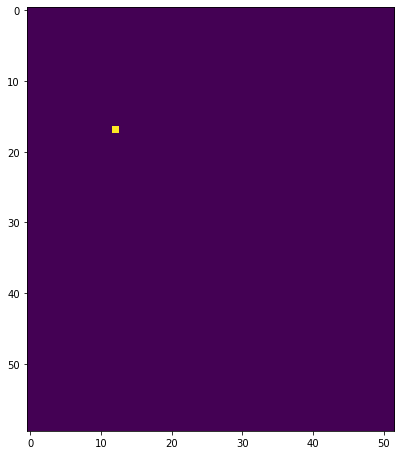

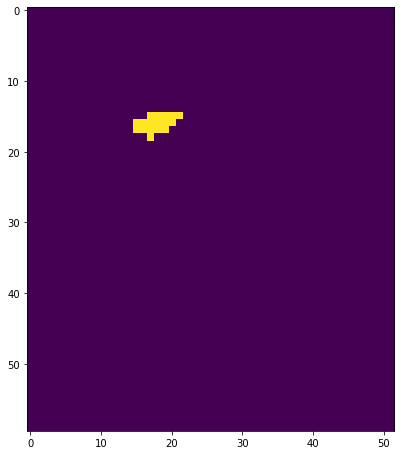

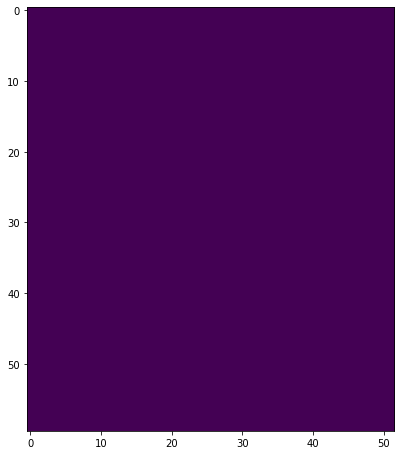

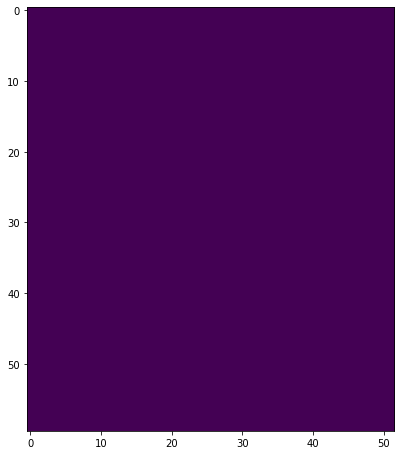

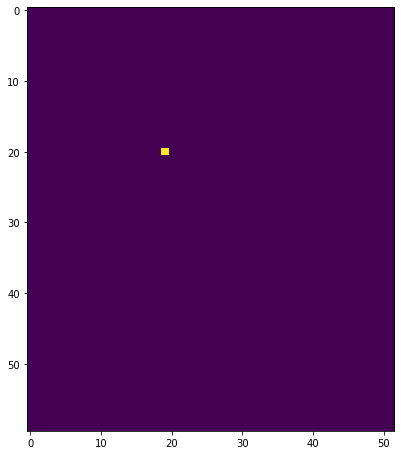

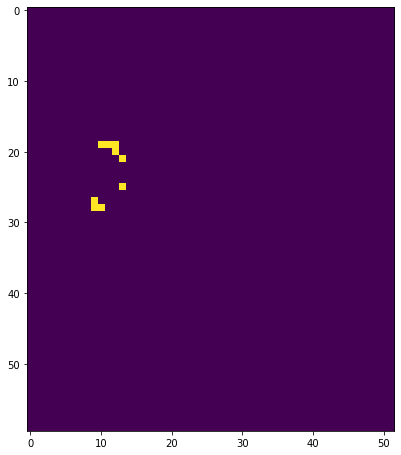

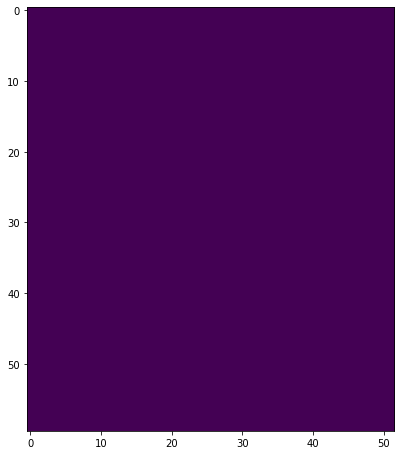

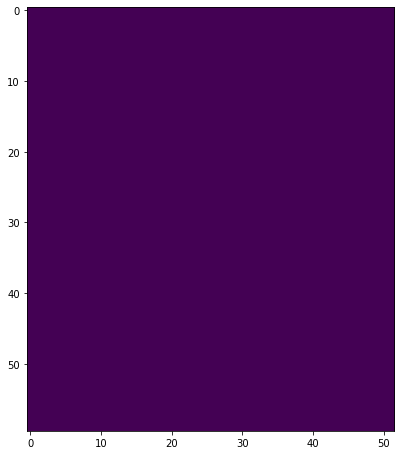

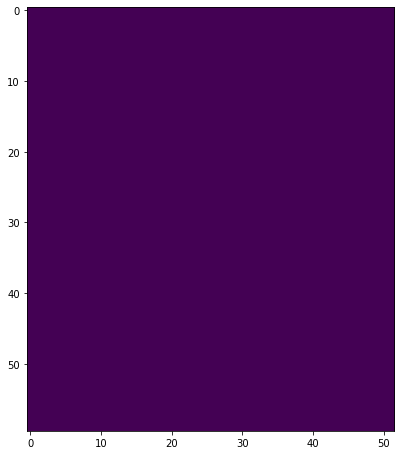

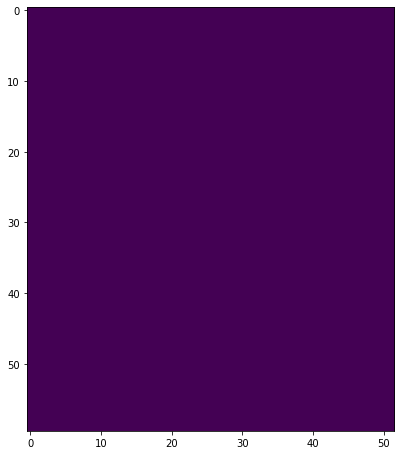

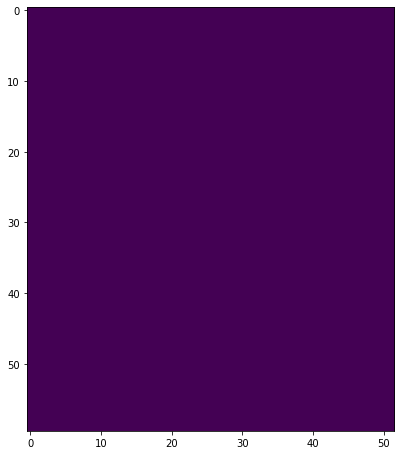

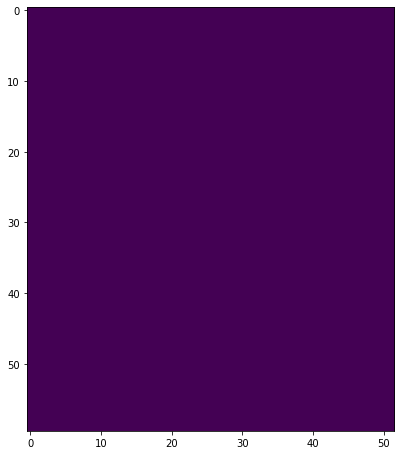

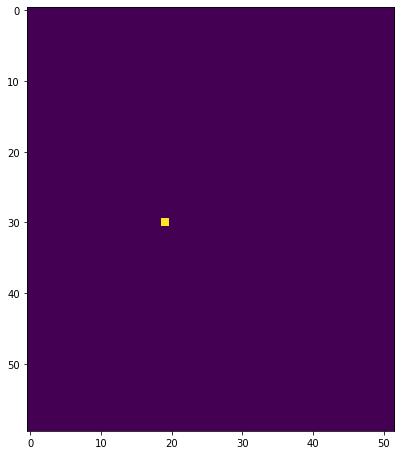

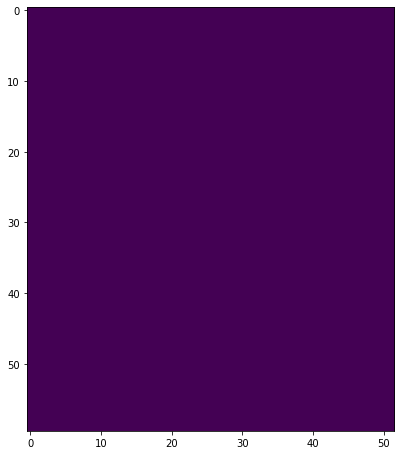

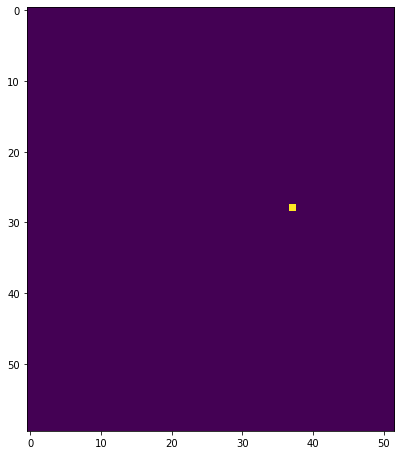

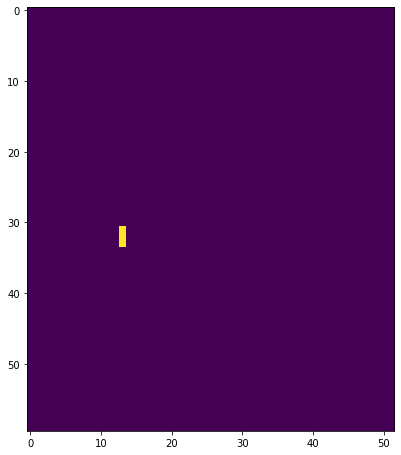

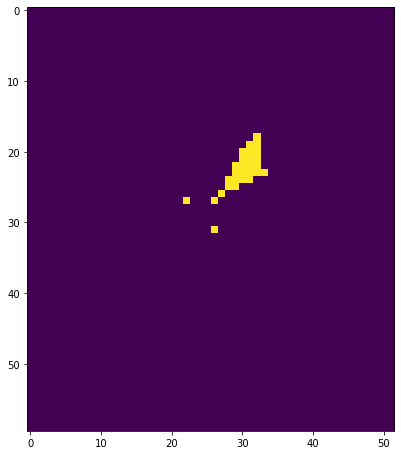

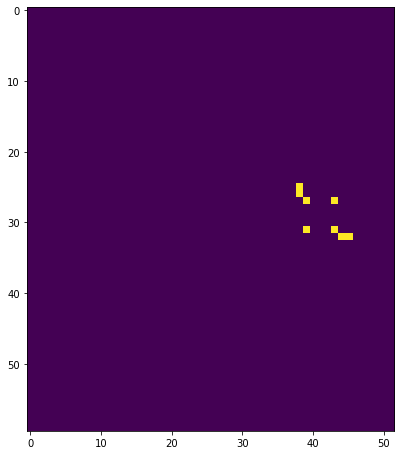

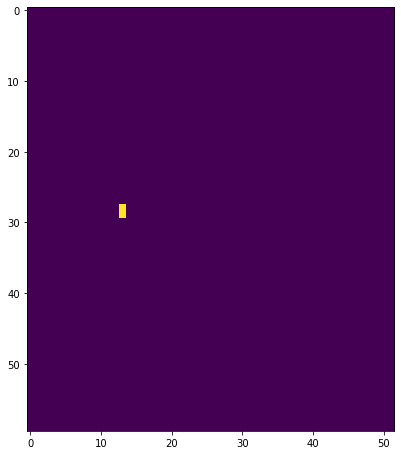

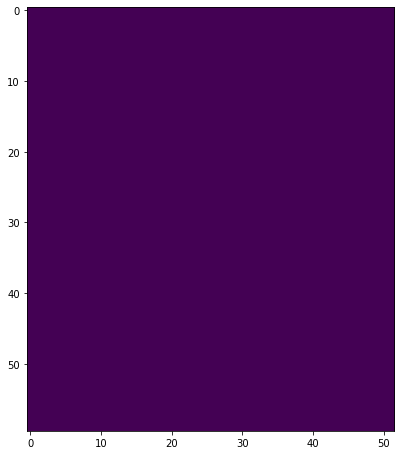

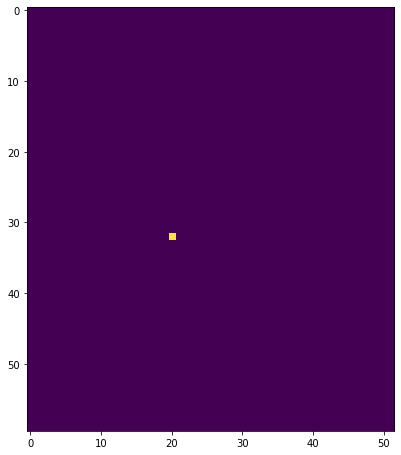

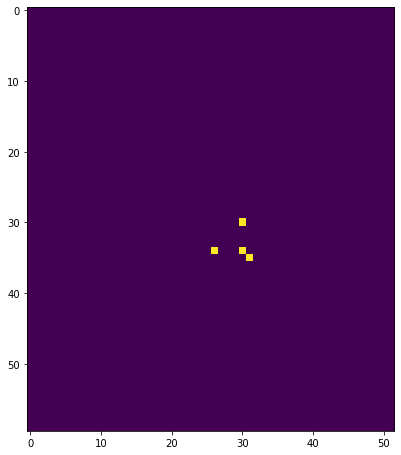

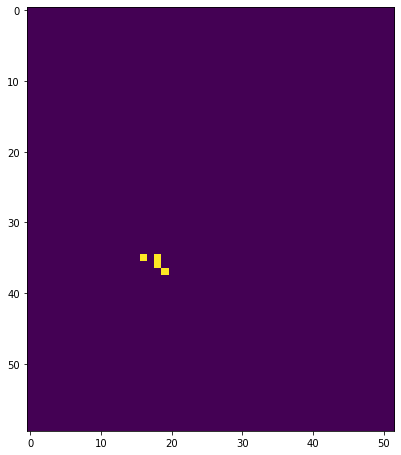

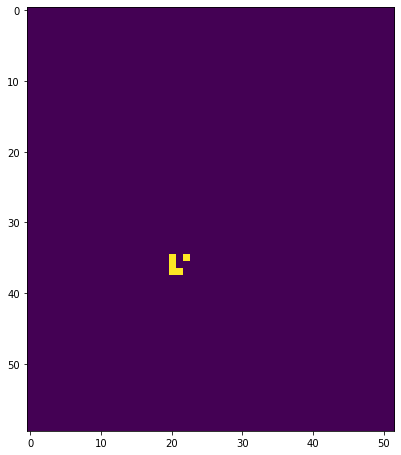

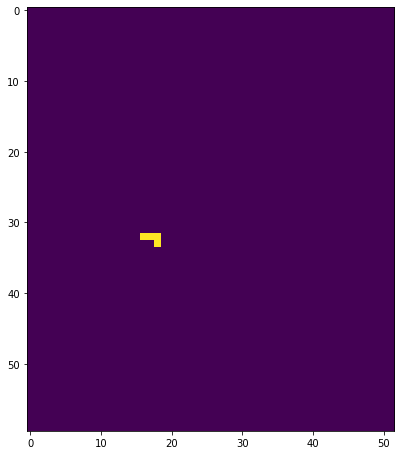

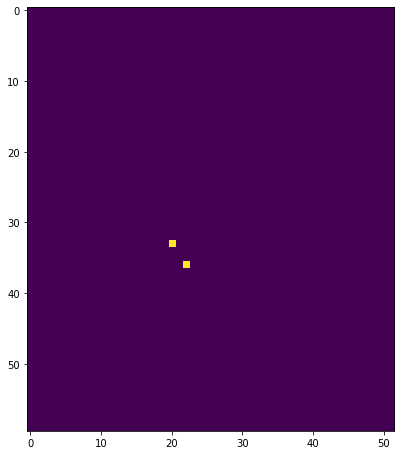

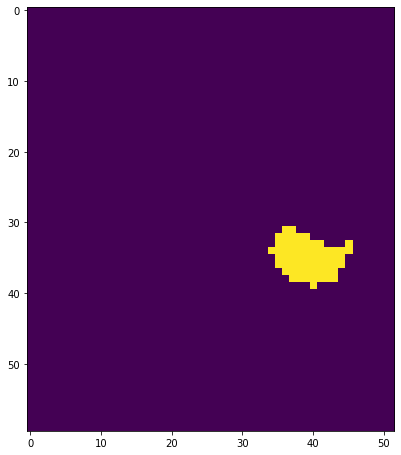

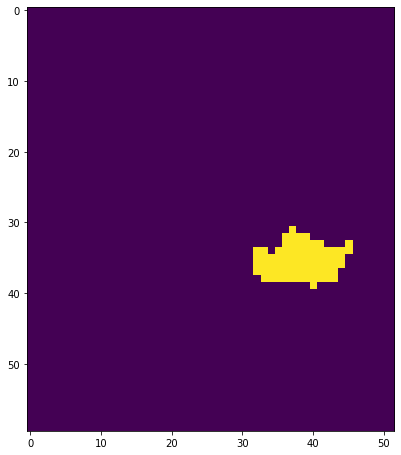

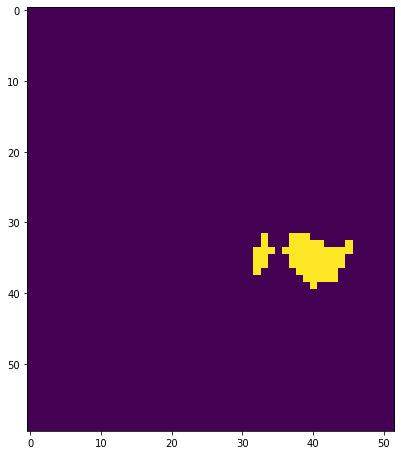

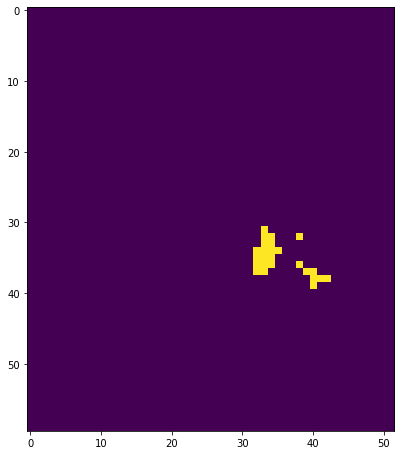

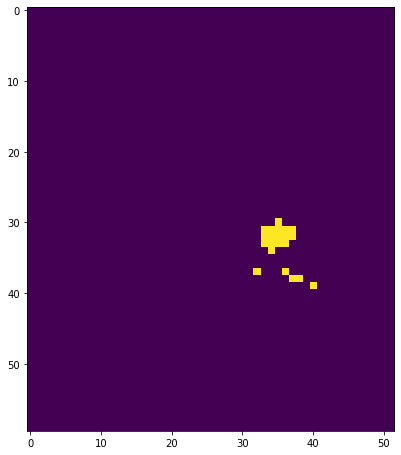

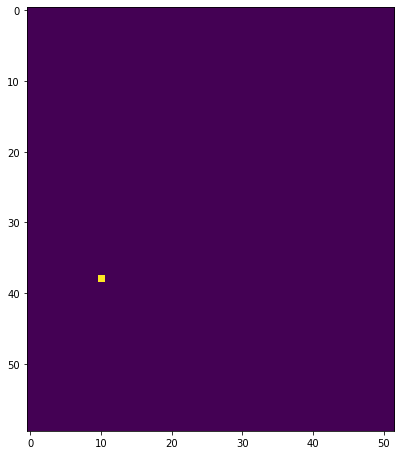

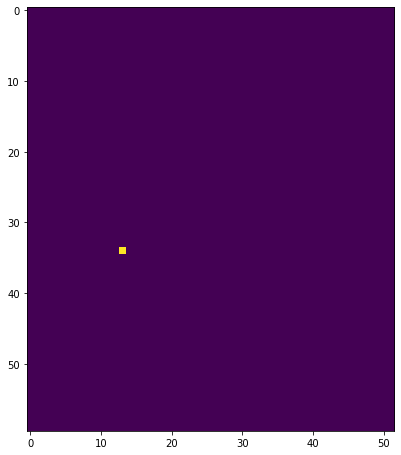

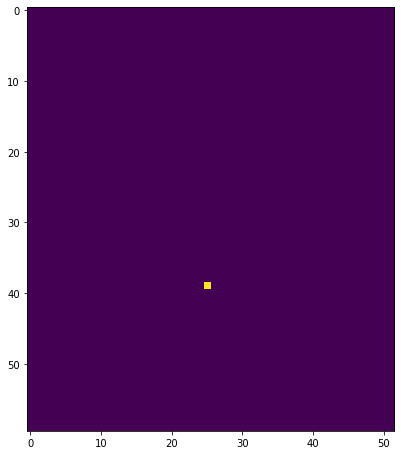

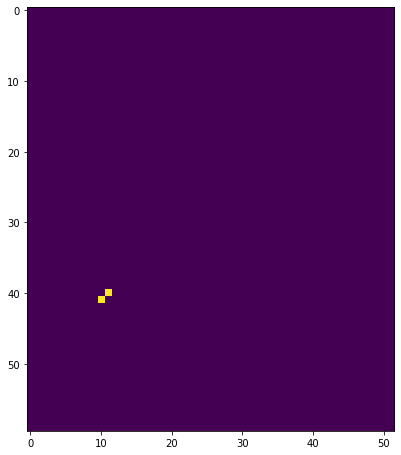

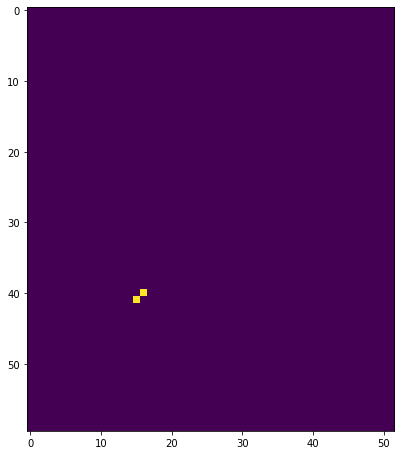

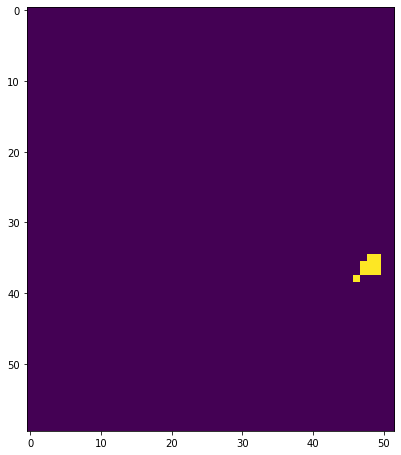

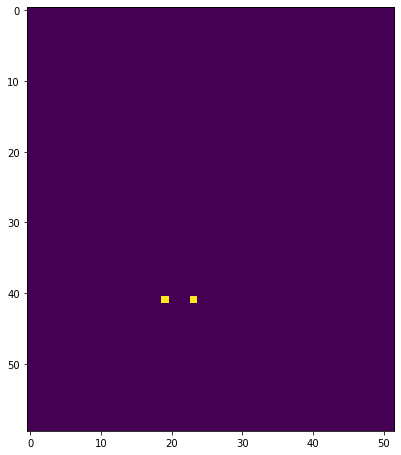

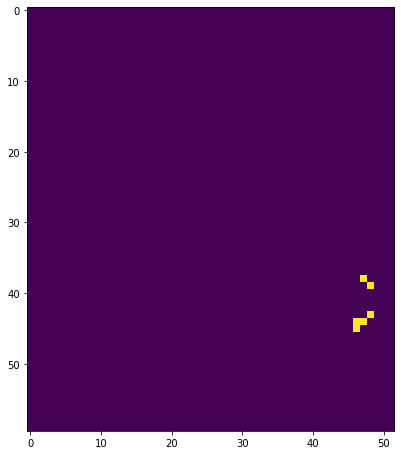

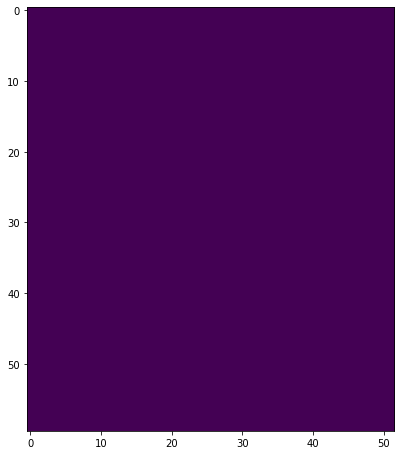

In [321]:
c = coords[1:]



def r(i,labels=labels, c = c):
    r = labels==labels[c[i][0],c[i][1]]
    return r


for i in range(len(z)):


    loc = np.zeros(z[0].shape)
    loc[c[i][0]][c[i][1]]=1
    plt.imshow(r(i)*(z[i]<1))
    plt.show()




## 

In [162]:
zws = np.zeros(( len(coords[1:]),labels.shape[0],labels.shape[1])) 

for i, c in enumerate(coords[1:]):
    zws[i] = labels==labels[c[0],c[1]]

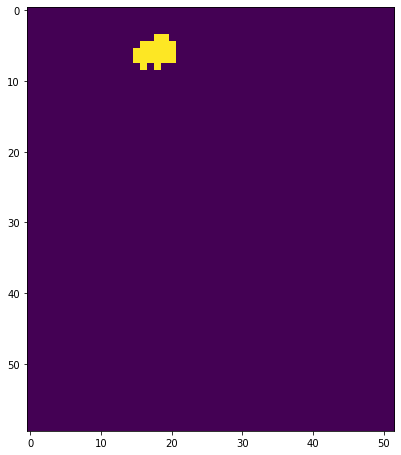

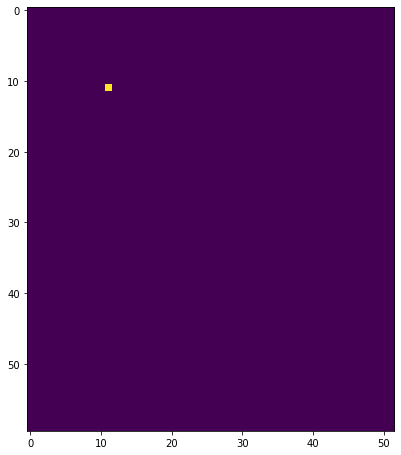

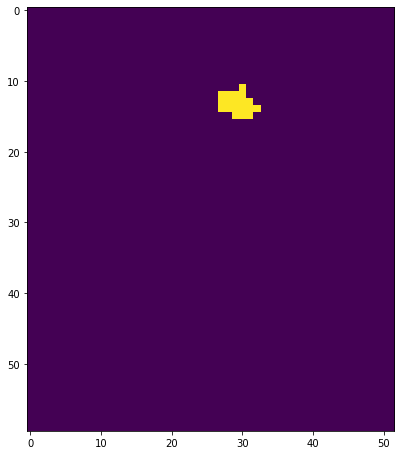

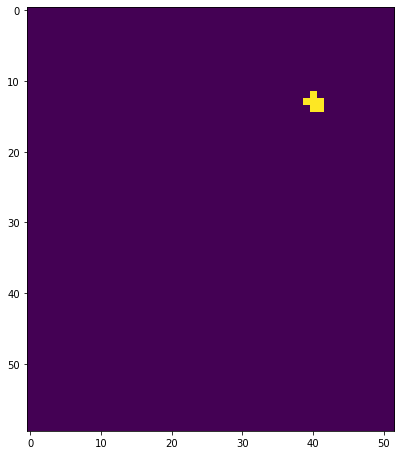

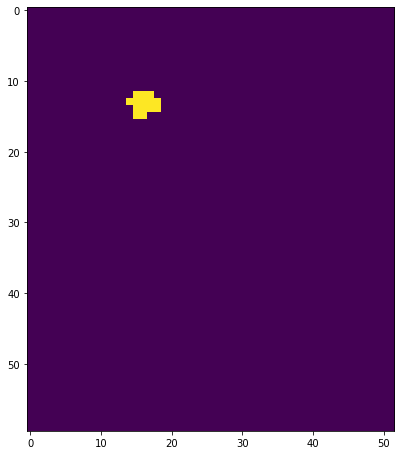

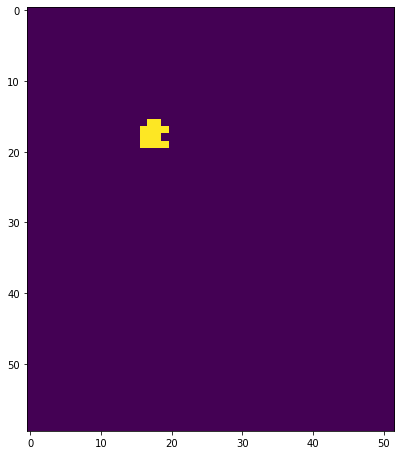

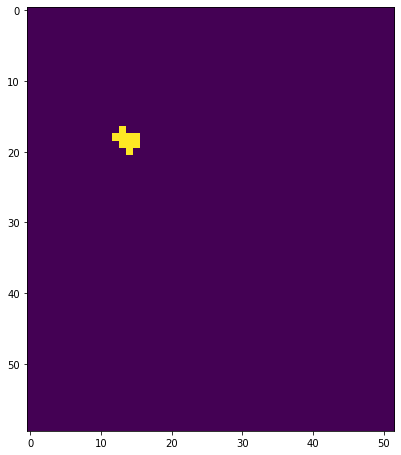

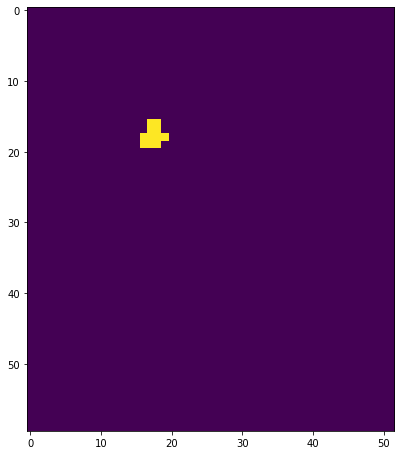

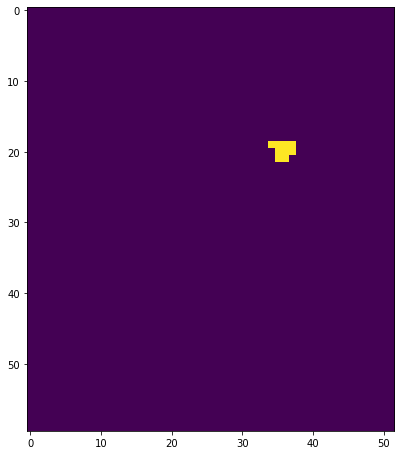

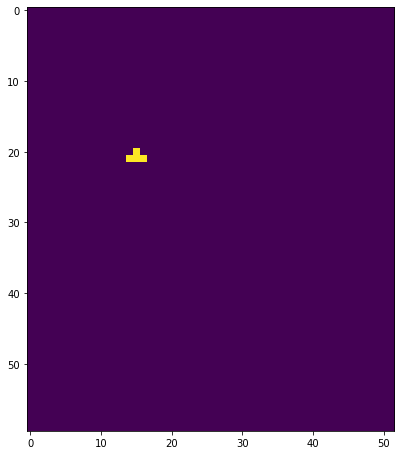

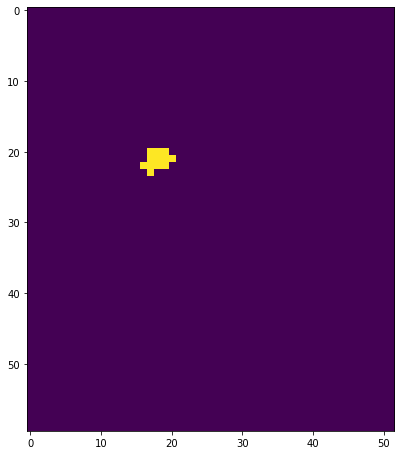

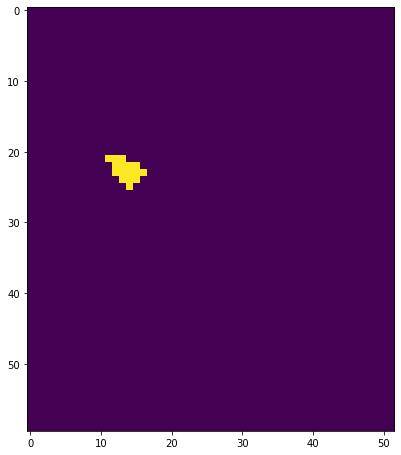

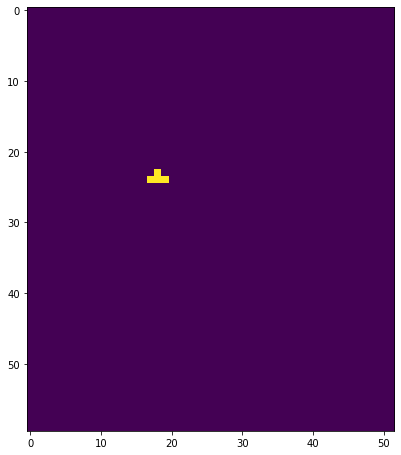

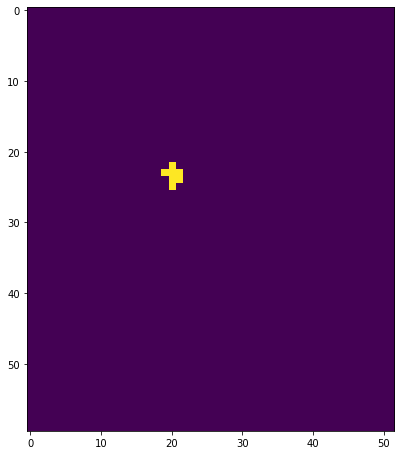

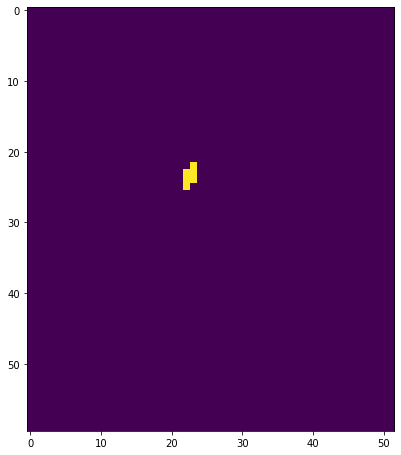

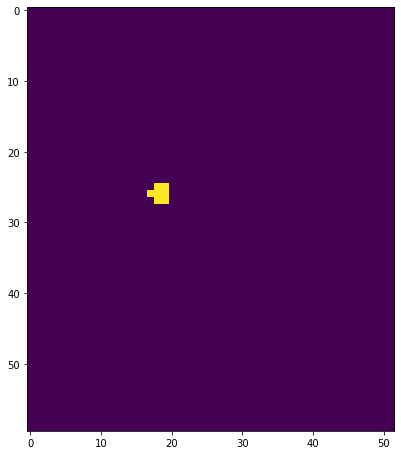

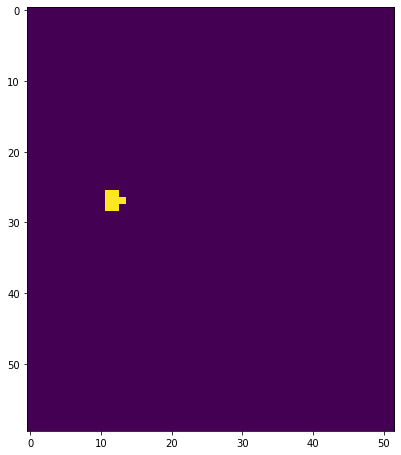

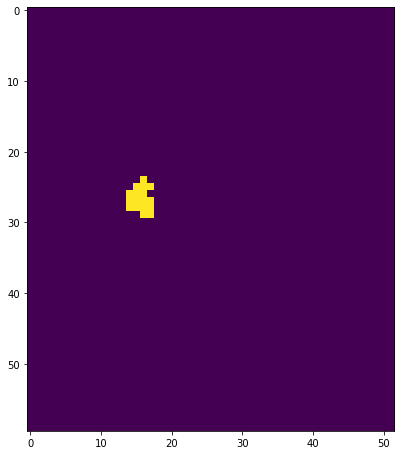

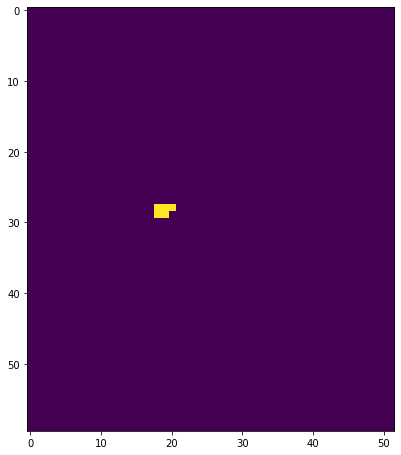

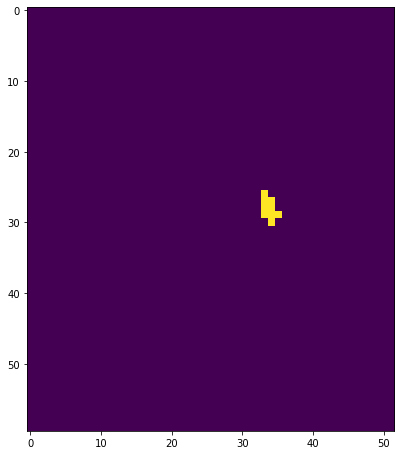

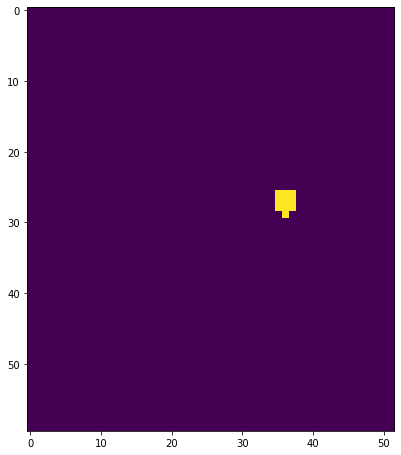

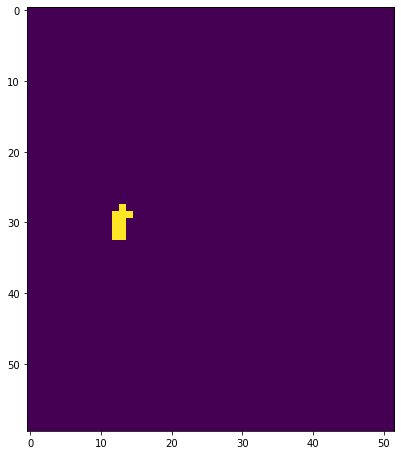

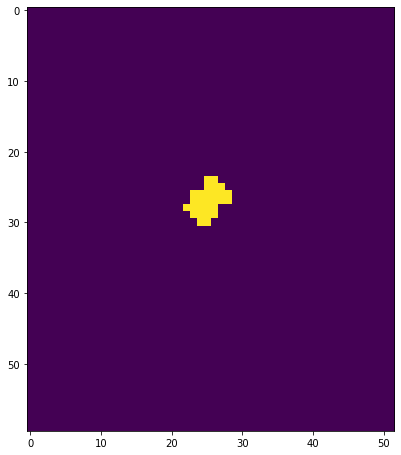

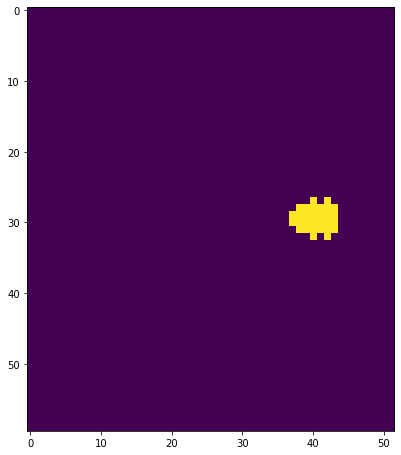

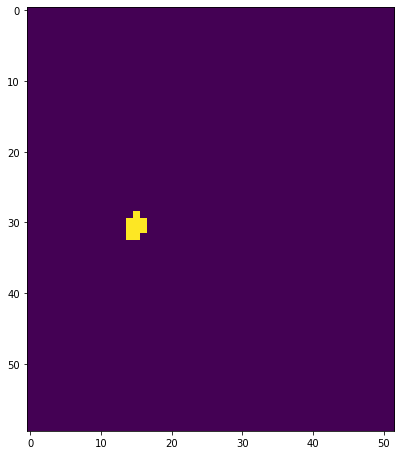

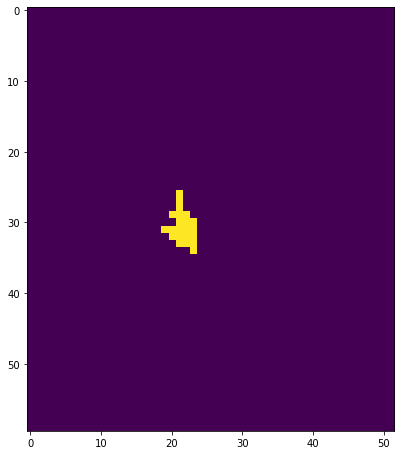

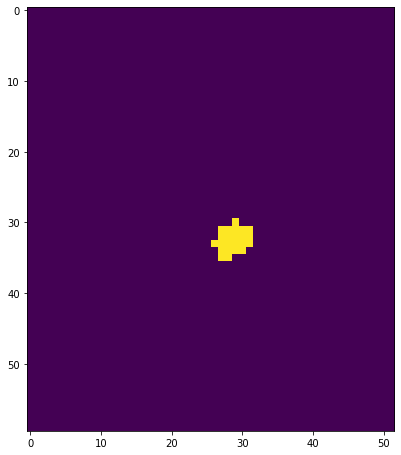

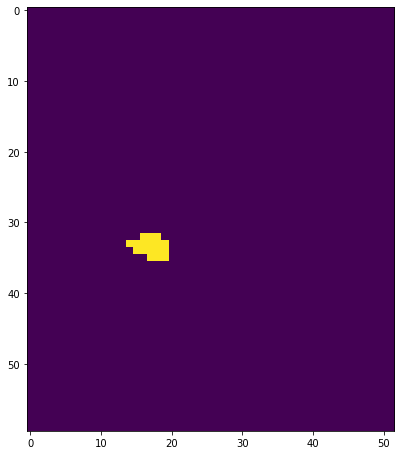

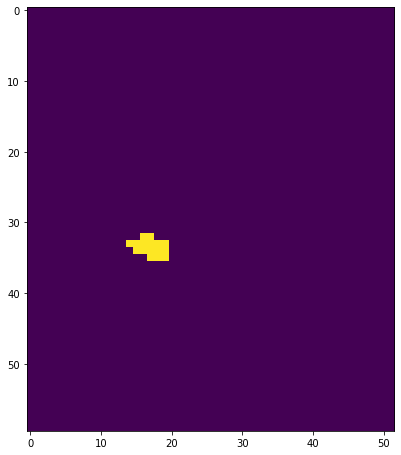

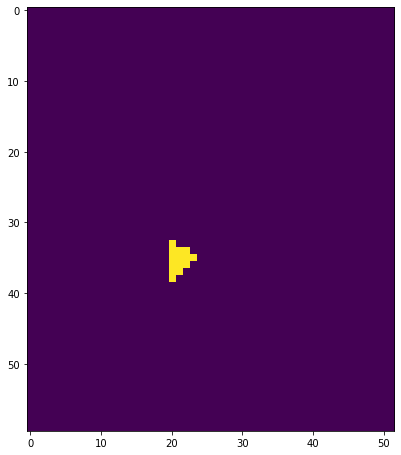

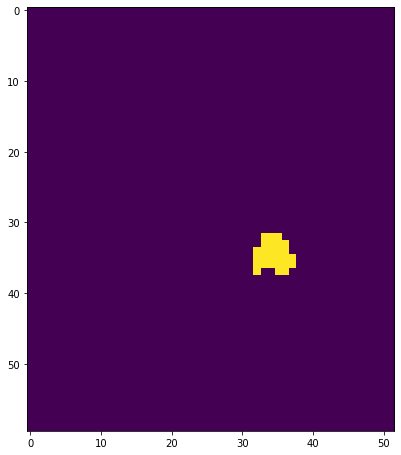

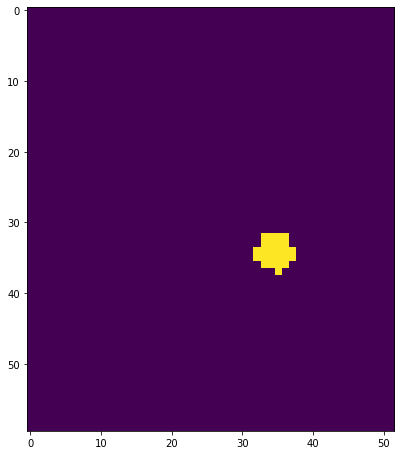

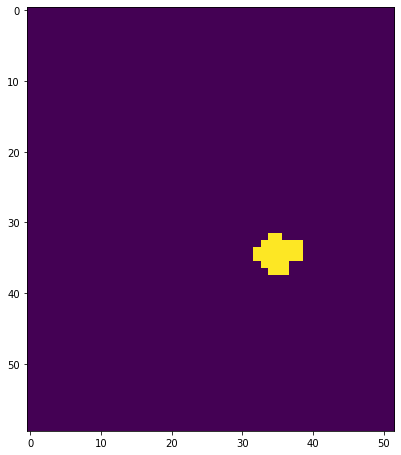

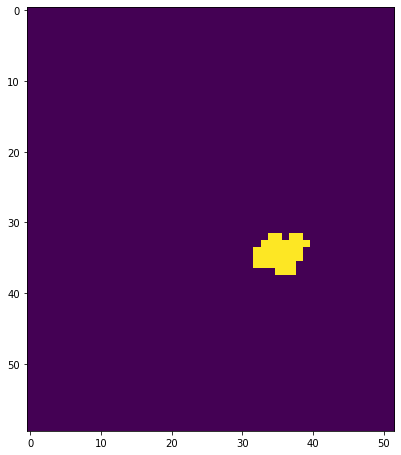

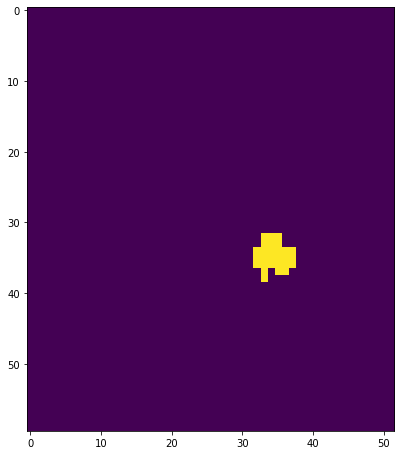

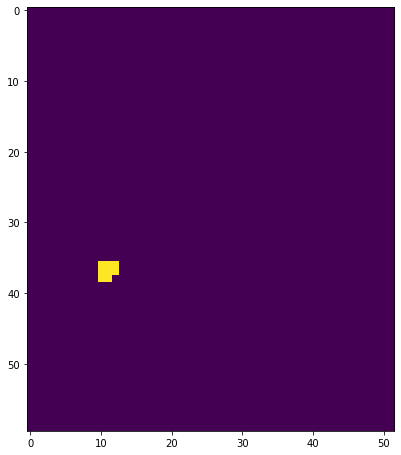

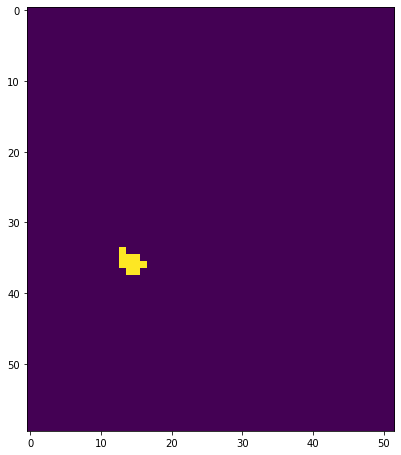

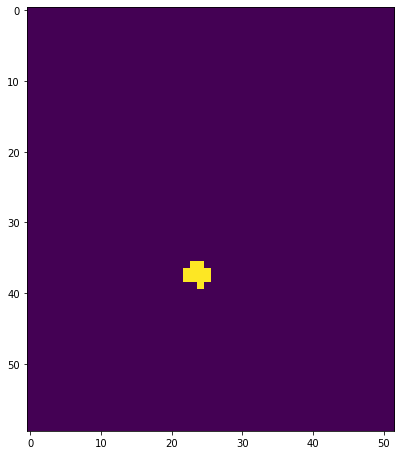

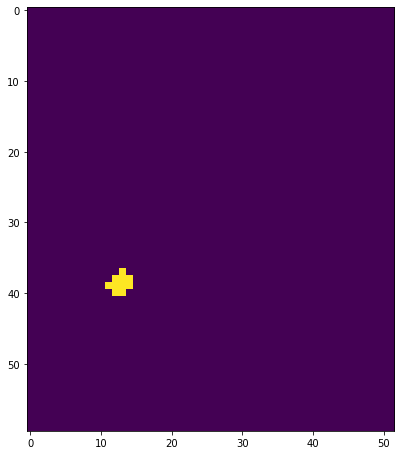

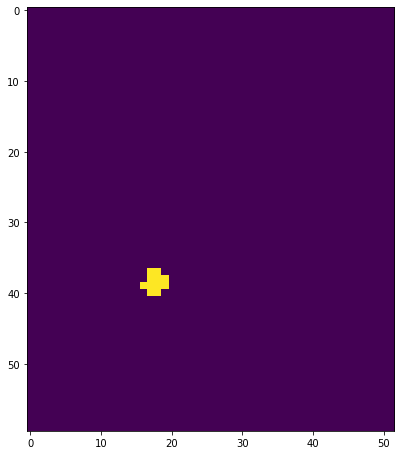

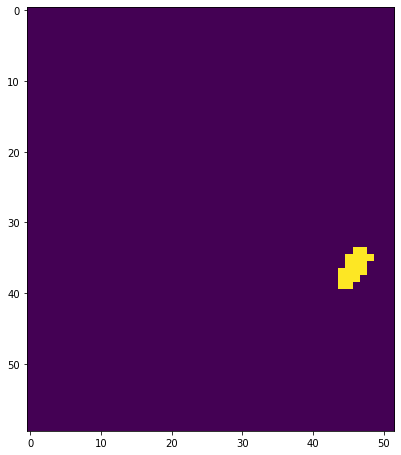

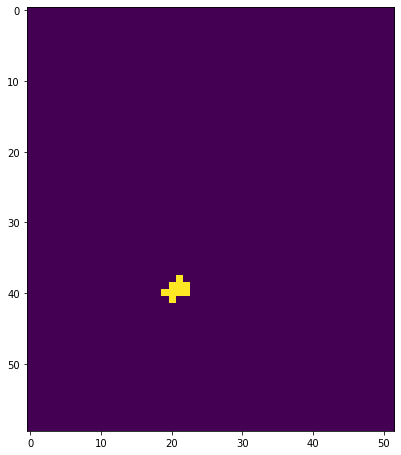

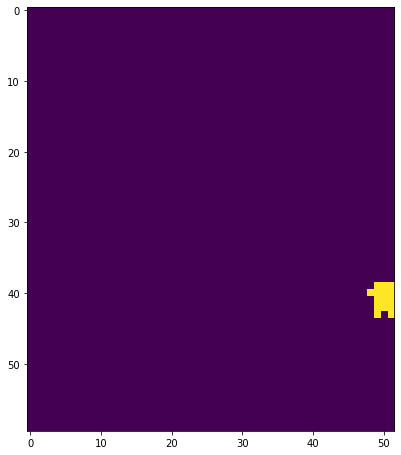

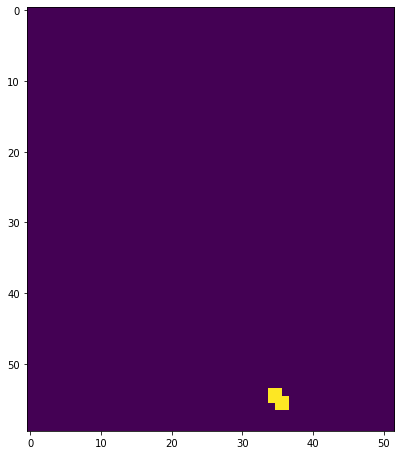

In [21]:
allregions = np.zeros((labels.shape[0],labels.shape[1])) 

for i in range(len(z)):
    
    r = (zws[i]*(z[i]>0))*(i+1)
    plt.imshow(r)
    allregions +=r
    plt.show()

In [164]:
def get_region(s,labels,c):
    return labels==labels[c[0],c[1]]

get_region()
    

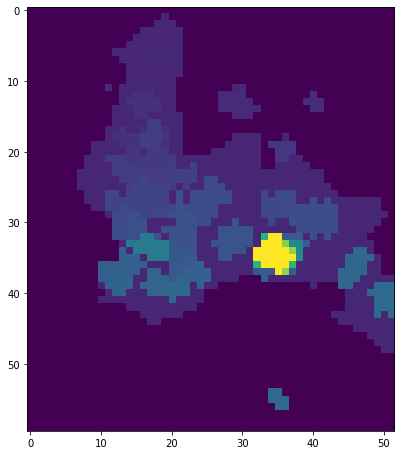

In [22]:
plt.imshow(allregions+(nonsat>0)*20)

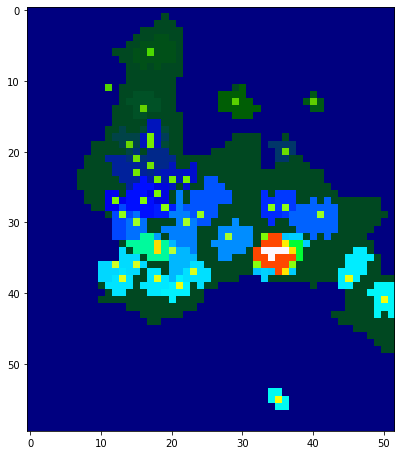

In [23]:
plt.imshow((allregions)+(nonsat>0)*10+seeds*10, cmap=plt.get_cmap("gist_ncar"))

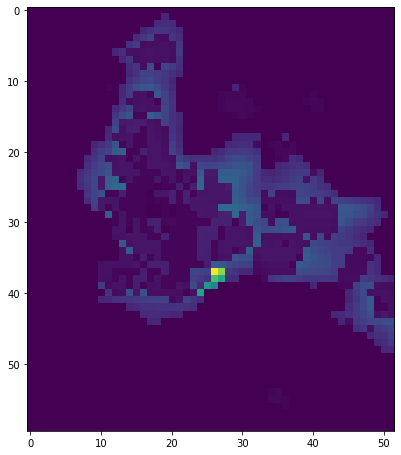

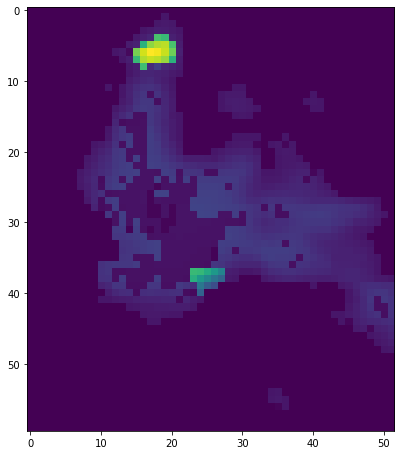

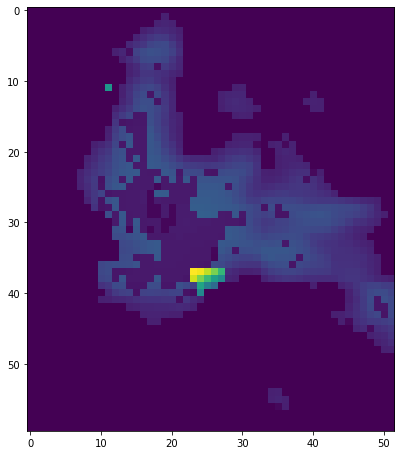

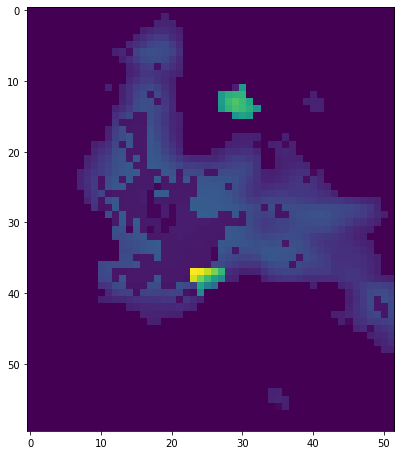

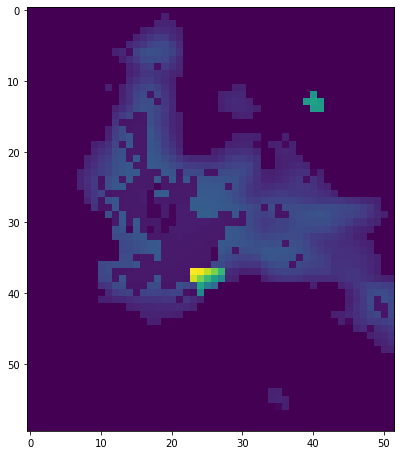

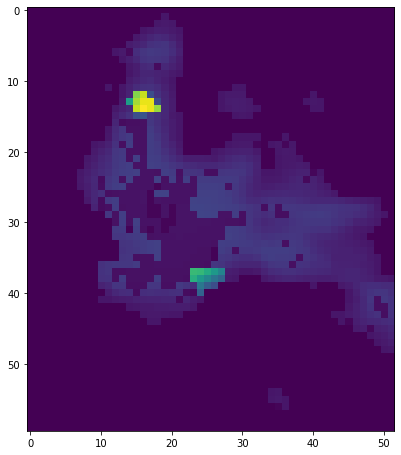

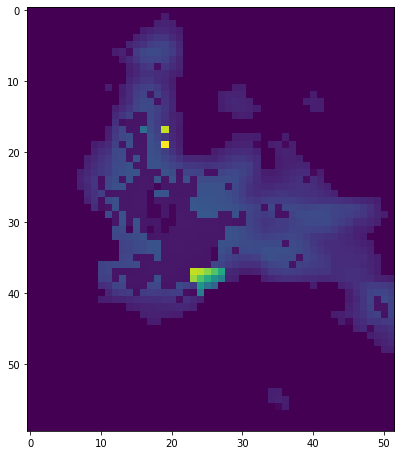

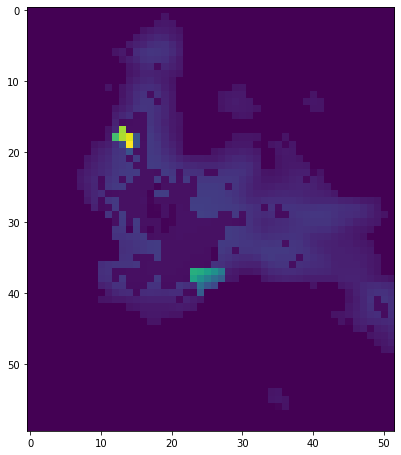

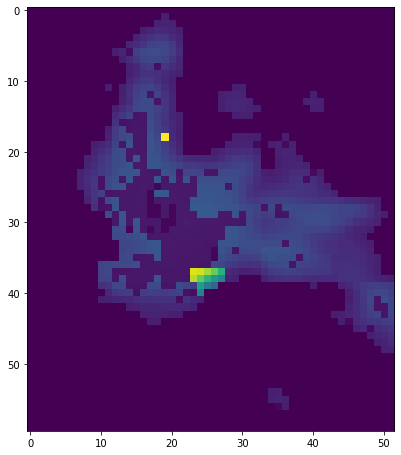

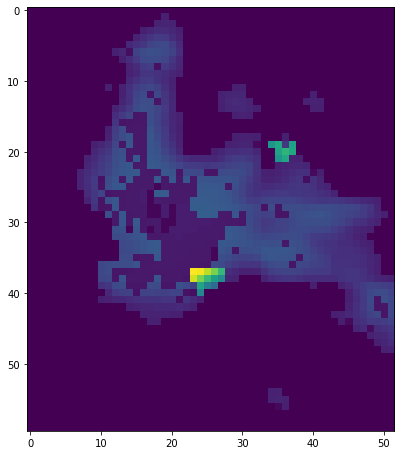

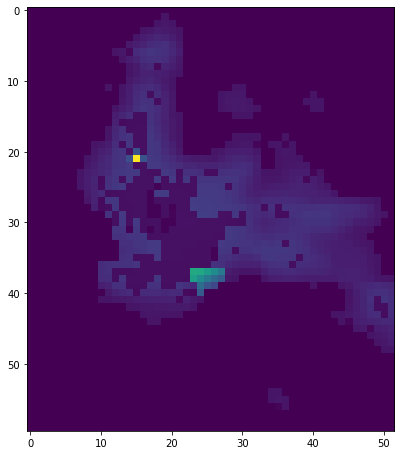

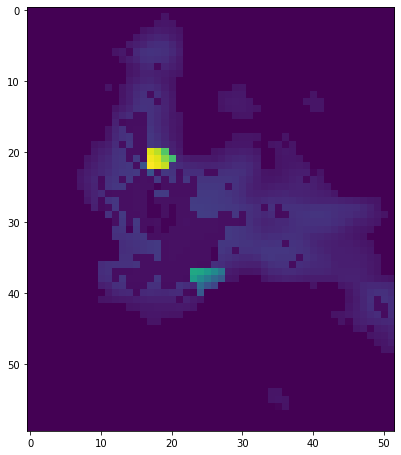

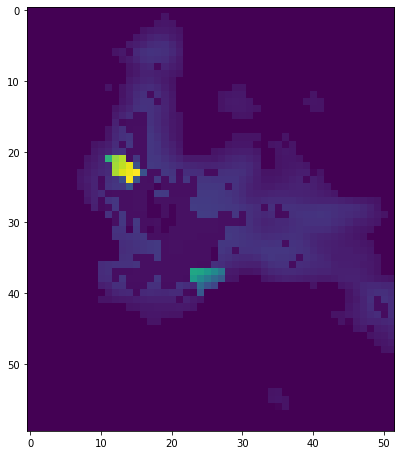

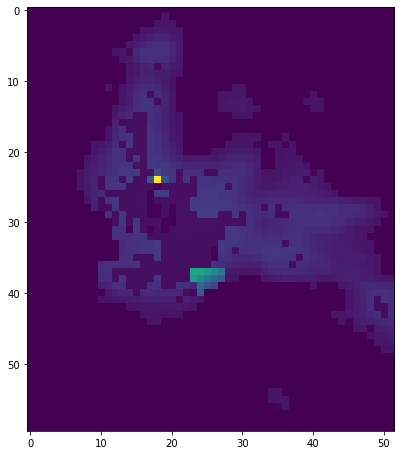

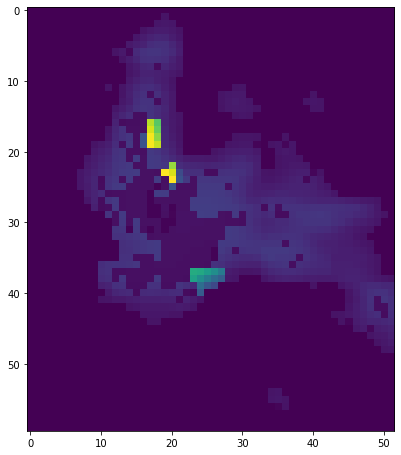

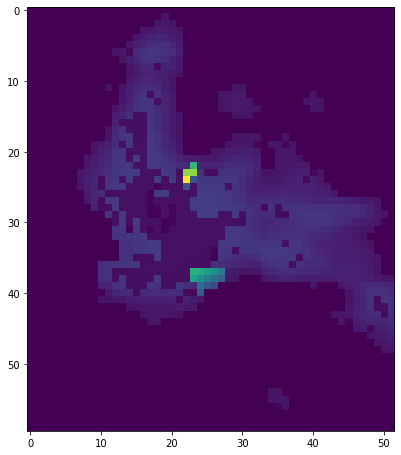

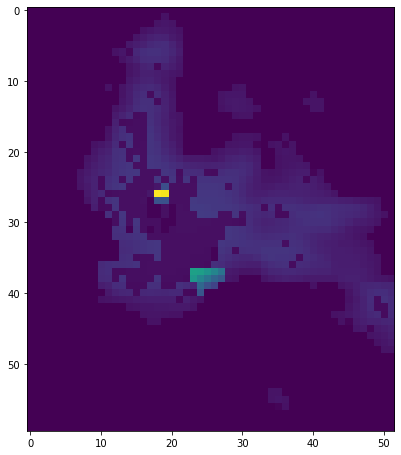

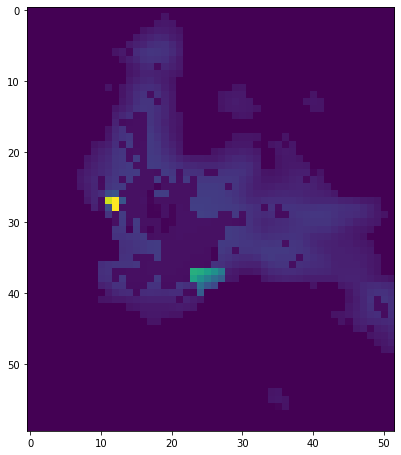

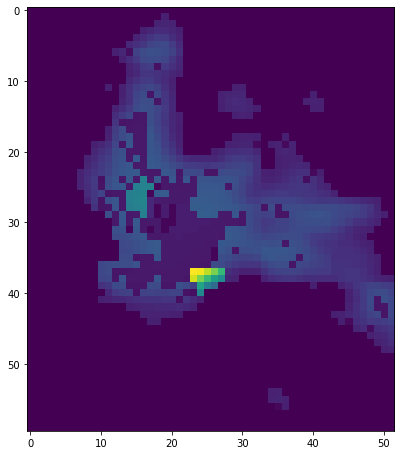

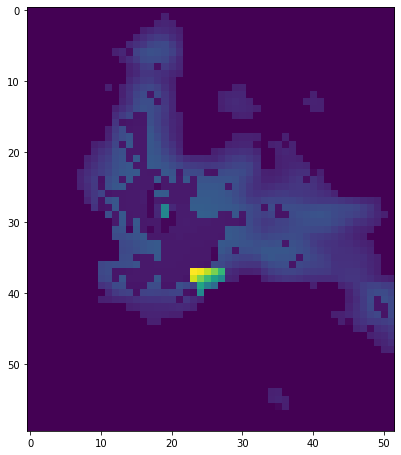

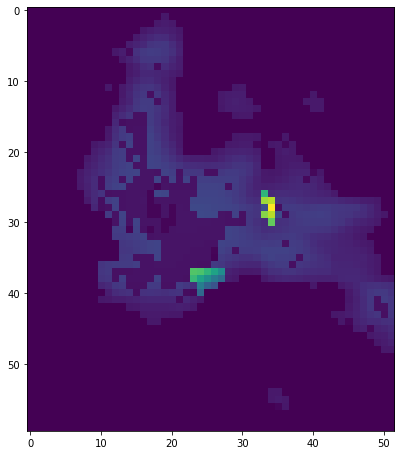

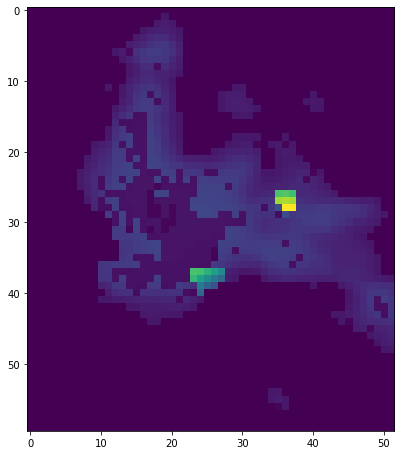

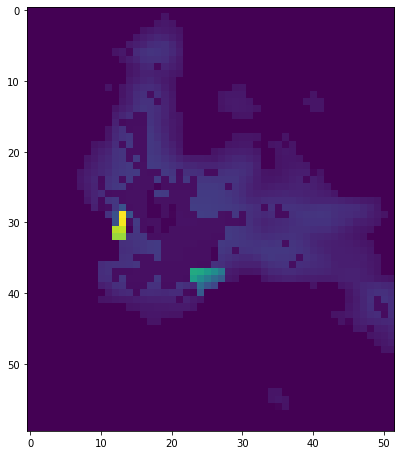

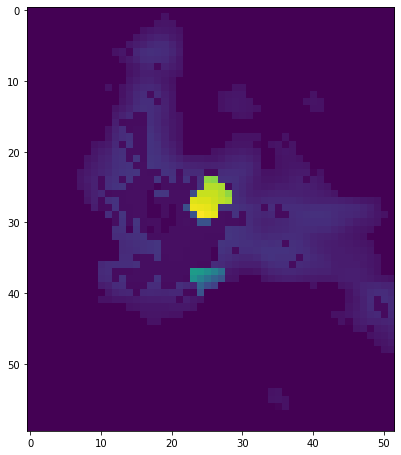

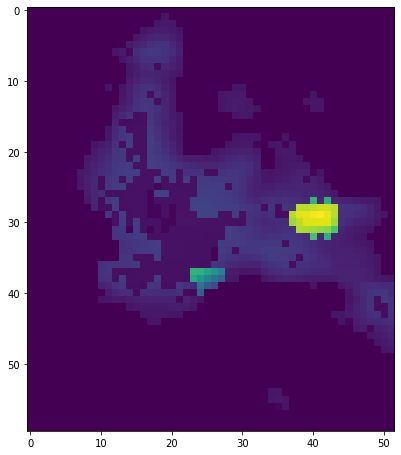

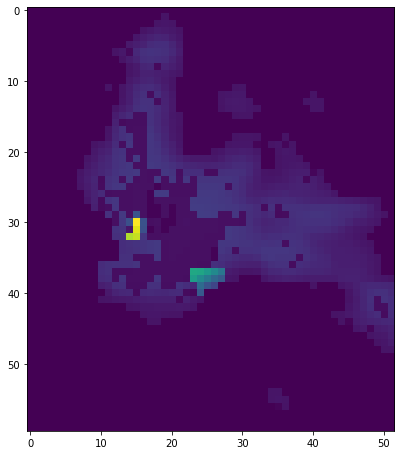

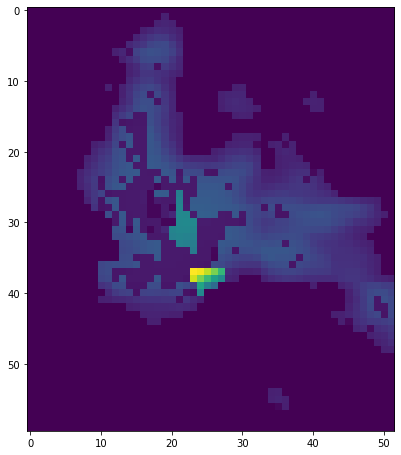

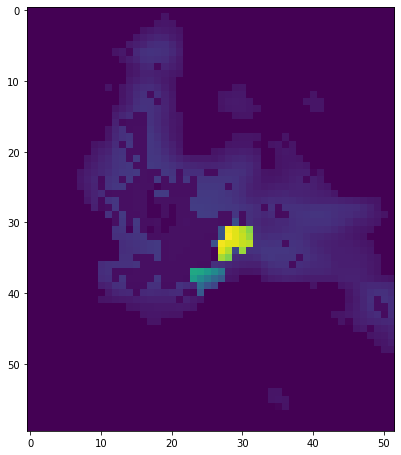

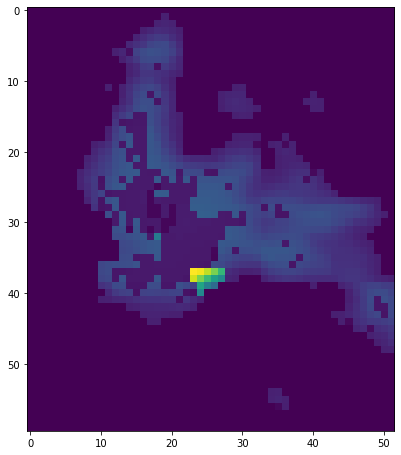

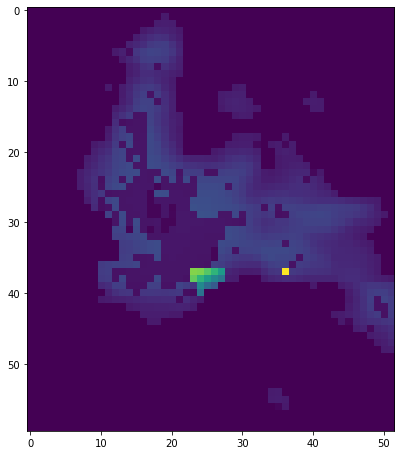

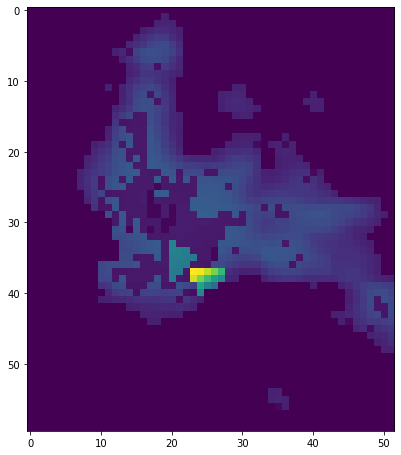

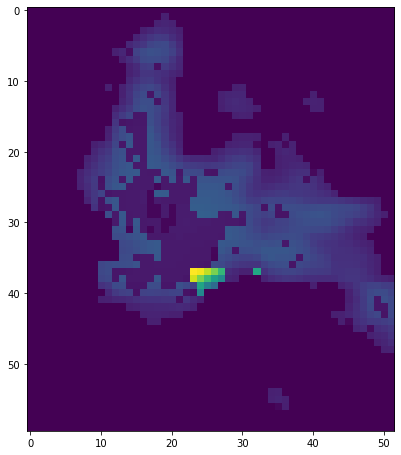

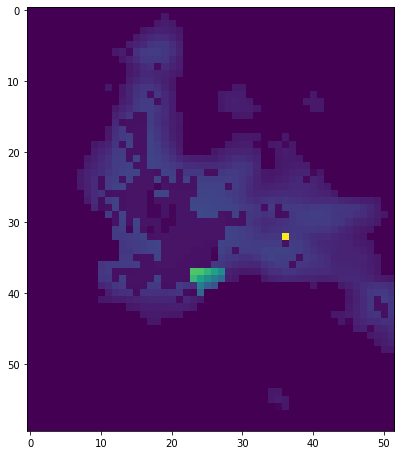

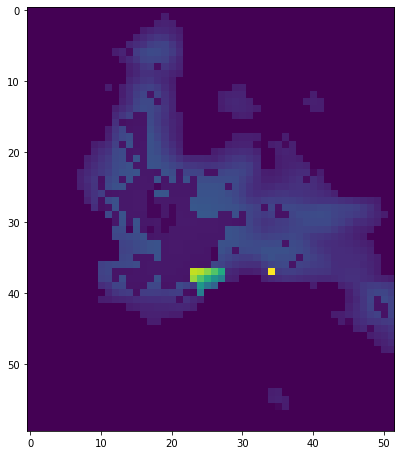

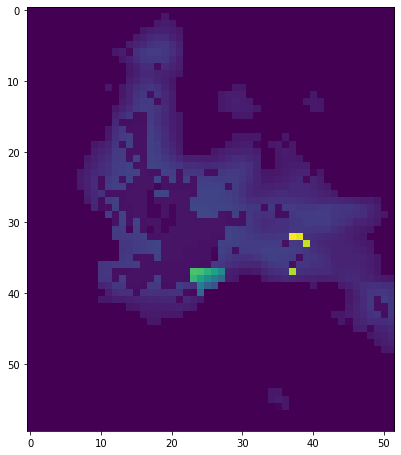

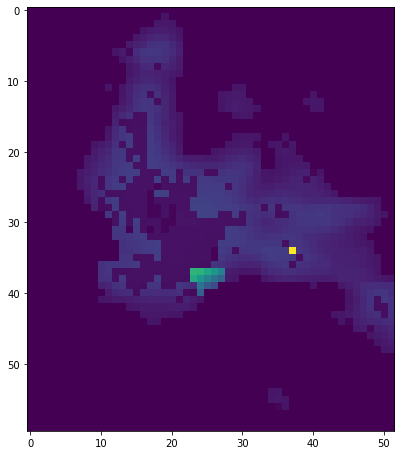

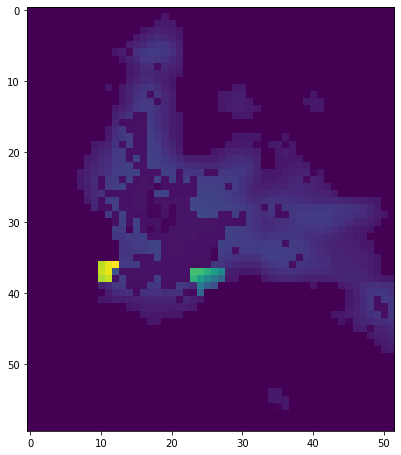

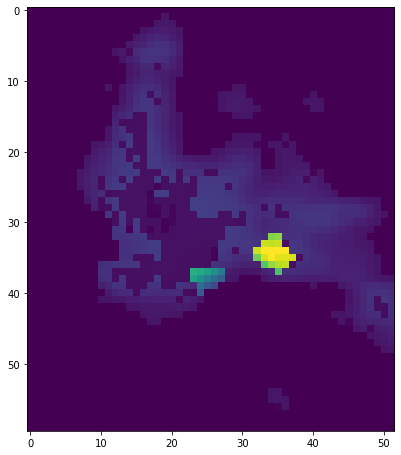

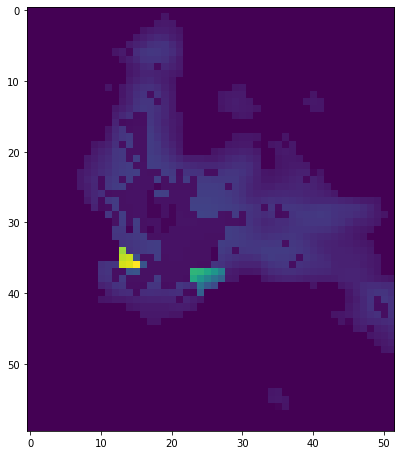

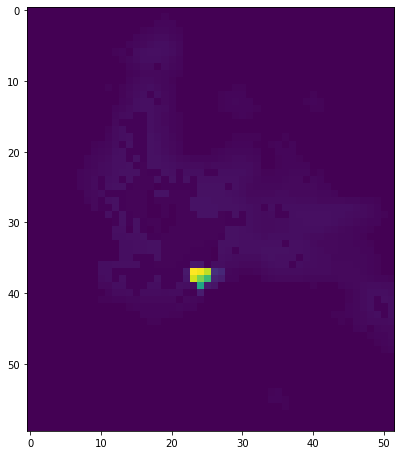

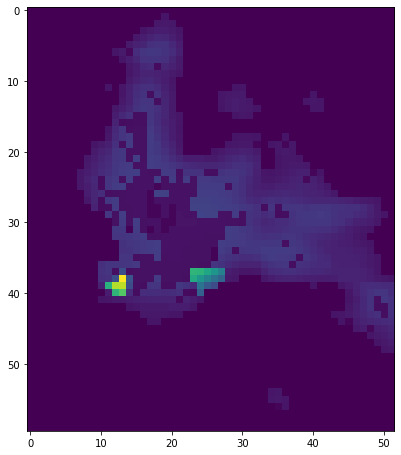

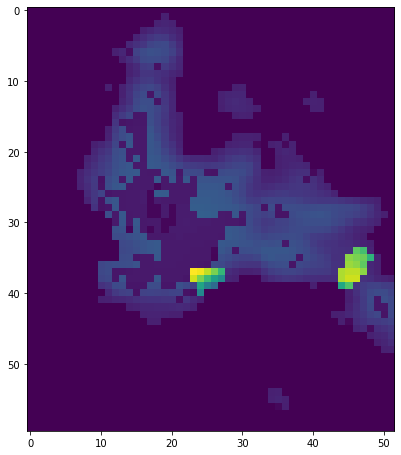

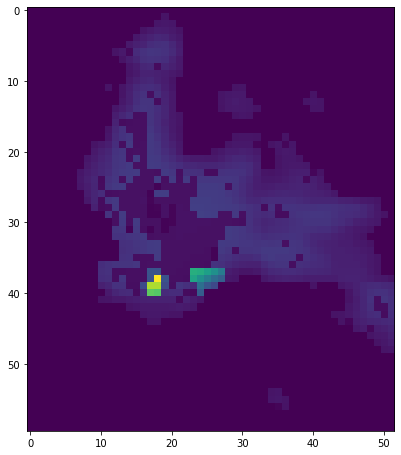

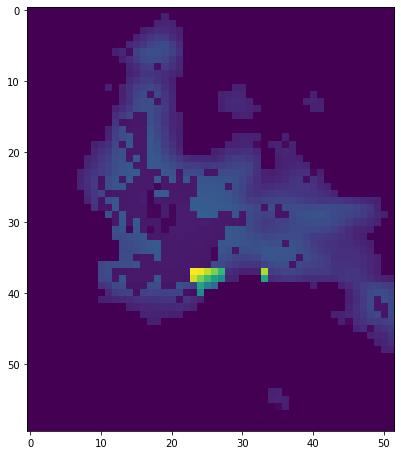

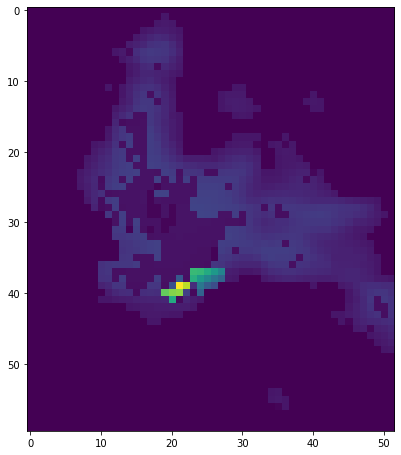

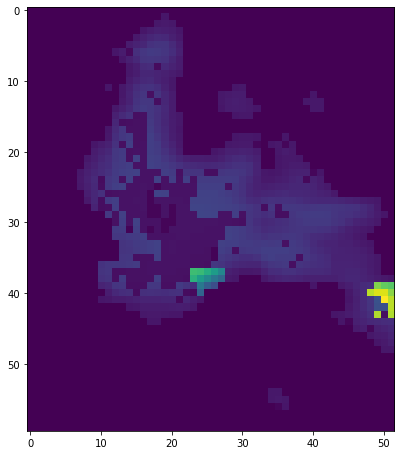

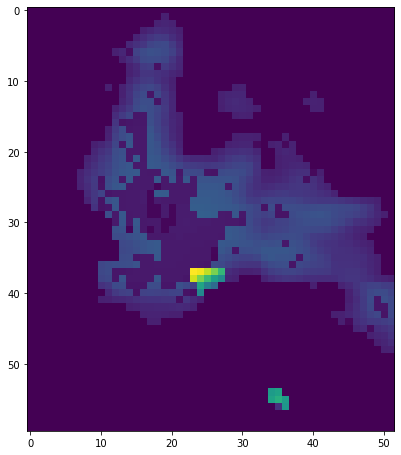

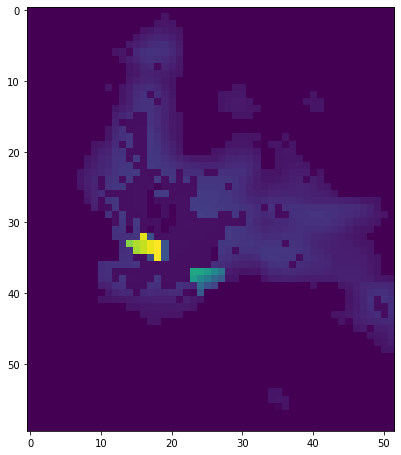

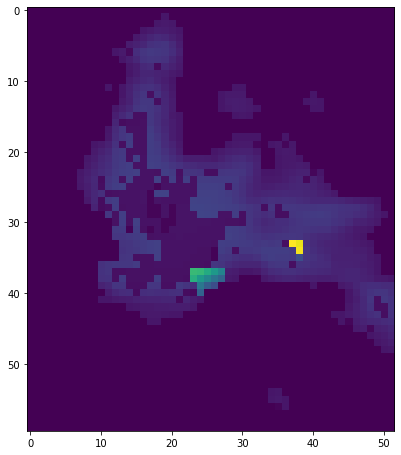

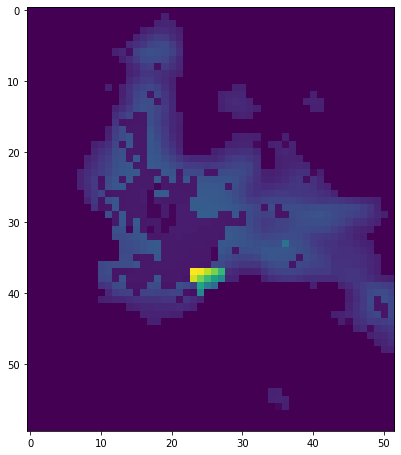

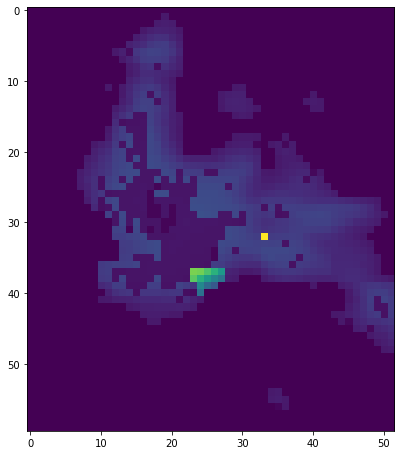

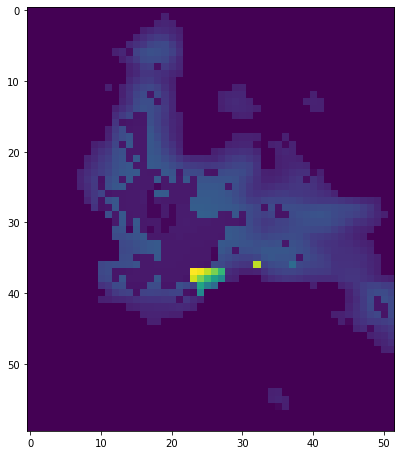

In [24]:
for i in set(allregions.flatten()):
    plt.imshow((allregions==i)*nonsat*5+nonsat)
    plt.show()

In [293]:
a = np.array([0,0,0,1,2,3,4,2,2,3,4,5])

In [298]:

th = 10
out_of_req  = np.where((a<=th)==False)
out_of_req[0][0]


6

https://scikit-gstat.readthedocs.io/en/latest/userguide/variogram.html

In [121]:
len(coords)

45

a) 7 in the ACM Digital Library; 
b) 206 in IEEE Xplore; 
c) 224 in ScienceDirect;
https://www.sciencedirect.com/search?qs=%28Optimal%20OR%20Optimum%20OR%20Optimization%29%20AND%20Sensor%20AND%20Placement%20AND%20%22Light%20Pollution%22&years=2010%2C2012%2C2013%2C2015%2C2016%2C2017%2C2018%2C2019%2C2020%2C2021%2C2022&lastSelectedFacet=articleTypes&articleTypes=REV%2CFLA
d) 43 in Scopus; 
e) 89 in SpringerLink; and 
f) 16 in Web of Science. 


Optim* AND Sensor AND Placement AND Light AND Pollution

Useful Links
https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/variogram_models.html
https://docs.python.org/3/library/pdb.html

In [ ]:
https://www.inegi.org.mx/app/geo2/elevacionesmex/